## Module 4 - Advanced Model Architectures
   - CNN Architectures
   - Creating Custom Datasets
   - Transfer-Learning Approaches
   - RNNs, GANs, Attention Mechanisms, Transformers

---

#### Convolutional Neural Networks (CNNs) (...recap...)

A Convolutional Neural Network (CNN) is a type of artificial neural network that excels in processing grid-like data, such as images, by using convolutional layers to extract and transform features. These networks learn hierarchical representations of data, allowing higher layers to recognize more complex patterns and features than lower layers. 

Key aspects of CNNs:
  - **Convolutional Layers**: These layers apply filters (kernels) to the input data, which are often images, to extract features like edges, shapes, and textures. 
  - **Pooling Layers**: These layers reduce the spatial dimensions of the feature maps, making the network less sensitive to small variations in the input. 
  - **Hierarchical Feature Learning**: CNNs learn features in a hierarchical manner, with lower layers learning basic features and higher layers combining these to recognize more complex patterns. 
  - **Applications**: CNNs are widely used in various fields, including image recognition, object detection, natural language processing, and more. 

#### Basic CNN Implementation

In [1]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
 def __init__(self):
    super(SimpleCNN, self).__init__()
   
    # First convolutional layer
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2)
 
    # Second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2)
 
    # Fully connected layers
    self.fc1 = nn.Linear(32 * 8 * 8, 128) # Assuming input size is 32x32
    self.relu3 = nn.ReLU()
    self.fc2 = nn.Linear(128, 10) # 10 output classes
 
 def forward(self, x):
    x = self.pool1(self.relu1(self.conv1(x)))
    x = self.pool2(self.relu2(self.conv2(x)))
    x = x.view(-1, 32 * 8 * 8) # Flatten
    x = self.relu3(self.fc1(x))
    x = self.fc2(x)
    return x

# Create model and check shape
model = SimpleCNN()
dummy_input = torch.randn(1, 3, 32, 32) # Batch size 1, 3 channels, 32x32 image
output = model(dummy_input)
print(f"Output shape: {output.shape}") # Should be [1, 10]


Output shape: torch.Size([1, 10])


#### Exercise: Modying CNN Architecture

In [ ]:
# Your Task: Complete this CNN class
class ImprovedCNN(nn.Module):
 def __init__(self, input_size=64, num_classes=10):
    super(ImprovedCNN, self).__init__()
    # First conv block
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2)
 
    # Second conv block - add more filters
    self.conv2 = # TODO: Add 32 filters with 3x3 kernel
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2)
 
    # Add dropout
    self.dropout = # TODO: Add dropout with 0.25 probability
 
    # Calculate size after pooling twice
    feature_size = input_size // 4
    flattened_size = 32 * feature_size * feature_size
 
    # Fully connected layers
    self.fc1 = nn.Linear(flattened_size, 128)
    self.relu3 = nn.ReLU()
    self.fc2 = nn.Linear(128, num_classes)
 
 def forward(self, x):
    # TODO: Complete the forward method
    return x

#### ImprovedCNN Solution

In [ ]:
class ImprovedCNN(nn.Module):
 def __init__(self, input_size=64, num_classes=10):
    super(ImprovedCNN, self).__init__()
    # First conv block
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2)
 
    # Second conv block
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2)
 
    # Add dropout
    self.dropout = nn.Dropout(0.25)
 
    # Calculate size after pooling twice
    feature_size = input_size // 4
    flattened_size = 32 * feature_size * feature_size
 
    # Fully connected layers
    self.fc1 = nn.Linear(flattened_size, 128)
    self.relu3 = nn.ReLU()
    self.fc2 = nn.Linear(128, num_classes)
 
 def forward(self, x):
    x = self.pool1(self.relu1(self.conv1(x)))
    x = self.pool2(self.relu2(self.conv2(x)))
    x = self.dropout(x)
    x = x.view(x.size(0), -1) # Flatten
    x = self.relu3(self.fc1(x))
    x = self.fc2(x)
    return x

# Test with different input sizes
model = ImprovedCNN(input_size=64)
dummy_input = torch.randn(1, 3, 64, 64)
output = model(dummy_input)
print(f"Output shape: {output.shape}") # Should be [1, 10]

#### Earliest CNN - LeNet-5

LeNet-5 was developed in the late 1990s by Yann LeCun, Leon Bottou, and others - as a neural network architecture for recognizing hand-written and machine-printed characters (mainly digits). It is still being used in banking systems for recognising handwritten digits on cheque leafs.

The image below shows the architecture of LeNet-5. It consists of two convolutional layers, each followed by a subsampling layer, and then three fully connected linear layers.

![image](./lenet5.png)


#### LeNet5 Implementation

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
 def __init__(self):
    super(LeNet5, self).__init__()
    
    # First convolutional layer: 1 input channel (grayscale), 6 output channels, 5x5 kernel
    self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
    
    # Second convolutional layer: 6 input channels, 16 output channels, 5x5 kernel
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
    
    # First fully connected layer: 16*5*5 input features, 120 output features
    self.fc1 = nn.Linear(16*5*5, 120)
    
    # Second fully connected layer: 120 input features, 84 output features
    self.fc2 = nn.Linear(120, 84)
 
    # Output layer: 84 input features, 10 output features (for 10 digits)
    self.fc3 = nn.Linear(84, 10)
 
 def forward(self, x):
    # Convolutional layer 1 + ReLU activation + 2x2 Max pooling
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
 
    # Convolutional layer 2 + ReLU activation + 2x2 Max pooling
    x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
 
    # Flatten tensor: reshape to (batch_size, 16*5*5)
    x = x.view(-1, 16*5*5)
 
    # FC layer 1 + ReLU
    x = F.relu(self.fc1(x))
 
    # FC layer 2 + ReLU
    x = F.relu(self.fc2(x))
    
    # Output layer
    x = self.fc3(x)
    return x



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
 def __init__(self):
    super(LeNet5, self).__init__()
    
    self.features = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.classifier = nn.Sequential(
        # First fully connected layer: 16*5*5 input features, 120 output features
        nn.Linear(16*5*5, 120),
        nn.ReLU(),
        # Second fully connected layer: 120 input features, 84 output features
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10) # The output layer
    )

 def forward(self, x):
    # Convolutional layer 1 + ReLU activation + 2x2 Max pooling
    # Flatten tensor: reshape to (batch_size, 16*5*5)

    x = self.features(x)
    x = x.view(-1, 16*5*5)
    x = self.classifier(x)
    return x



### CNN using AlexNet

AlexNet is an advanced deep convolutional neural network (CNN) architecture, developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012. It's primarily known for its significant performance in the ImageNet Large Scale Visual Recognition Challenge, marking a key moment in the history of deep learning. AlexNet's innovative design and successful application paved the way for the widespread adoption of deep CNNs in computer vision and other fields. 

Key Features and Innovations:
 - **Eight Layers**: AlexNet consists of eight layers: five convolutional layers and three fully connected layers. 
 - **ReLU Activation**: It utilized Rectified Linear Units (ReLU) as activation functions, which sped up training compared to traditional sigmoid or tanh activations. 
 - **Dropout**: AlexNet incorporated dropout, a regularization technique that randomly drops out neurons during training, preventing overfitting. 
 - **GPU Training**: AlexNet was trained on multiple GPUs, which significantly reduced training time. 
 - **Overlapping Pooling**: It used overlapping pooling, which helped capture more details in the feature maps. 
 - ImageNet Success: AlexNet achieved an unprecedented 15.3% top-5 error rate in the ImageNet Large Scale Visual Recognition Challenge, surpassing previous state-of-the-art methods. 
 - **Foundation for Modern AI**: AlexNet's success demonstrated the power of deep CNNs and inspired the development of more advanced architectures. 


The image below shows the architecture of AlexNet.

![](./alexnet.png)


We will use CIFAR10 dataset for this example.
![](./cifar10.png)

#### AlexNet Implementation in PyTorch

In [11]:
import torch.nn as nn
class AlexNet(nn.Module):
 def __init__(self, num_classes=1000):
    super(AlexNet, self).__init__()
    
    self.features = nn.Sequential(
           # Layer 1: Conv -> ReLU -> MaxPool
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
 
            # Layer 2: Conv -> ReLU -> MaxPool
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
 
            # Layer 3: Conv -> ReLU
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
 
            # Layer 4: Conv -> ReLU
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
 
            # Layer 5: Conv -> ReLU -> MaxPool
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
    )
 
    # Classification layers
    self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
    )

 def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), 256 * 6 * 6)
    x = self.classifier(x)
    return x


#### Builtin Vision Training Models in PyTorch

In [13]:
import torch
import torchvision.models as models

# 1. Create a LeNet model (from our implementation)
lenet = LeNet5()

# 2. Create an AlexNet model with 10 output classes
alexnet = models.alexnet(weights="DEFAULT")
alexnet.classifier[6] = nn.Linear(4096, 10) # Modify the last layer

# 3. Create a ResNet-18 model with 10 output classes
resnet18 = models.resnet18(weights="DEFAULT")
resnet18.fc = nn.Linear(512, 10) # Modify the final fully connected layer

# 4. Create a VGG-16 model with pre-trained weights
vgg16 = models.vgg16(weights="DEFAULT")
vgg16.classifier[6] = nn.Linear(4096, 10) # Modify the last layer

# 5. Print the number of parameters in each model
def count_parameters(model):
   return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"LeNet-5 parameters: {count_parameters(lenet):,}")
print(f"AlexNet parameters: {count_parameters(alexnet):,}")
print(f"ResNet-18 parameters: {count_parameters(resnet18):,}")
print(f"VGG-16 parameters: {count_parameters(vgg16):,}")

# Output:
# LeNet-5 parameters: 61,706
# AlexNet parameters: 57,046,090
# ResNet-18 parameters: 11,181,642
# VGG-16 parameters: 138,357,544


LeNet-5 parameters: 61,706
AlexNet parameters: 57,044,810
ResNet-18 parameters: 11,181,642
VGG-16 parameters: 134,301,514


### Training Models with Custom Datasets

In [14]:
from torchvision.datasets import ImageFolder

In [16]:
imgs = ImageFolder("../Datasets/Chessman-image-dataset/Chess")
print(imgs, type(imgs), sep="\n")

Dataset ImageFolder
    Number of datapoints: 552
    Root location: ../Datasets/Chessman-image-dataset/Chess
<class 'torchvision.datasets.folder.ImageFolder'>


In [17]:
imgs.classes

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [29]:
imgs[200][1]

2

In [30]:
from torch.utils.data import random_split
print(type(imgs))

train, validate, test = random_split(imgs, [0.8, 0.1, 0.1])
print(type(train), type(validate), type(test))
print(len(train), len(validate), len(test))

<class 'torchvision.datasets.folder.ImageFolder'>
<class 'torch.utils.data.dataset.Subset'> <class 'torch.utils.data.dataset.Subset'> <class 'torch.utils.data.dataset.Subset'>
442 55 55


In [39]:
class ChessImageDataset():
    def __getitem__(self, idx):
        if 0 <= idx < 10:
            return idx*idx
        else:
            raise IndexError("Index out of range")

    def __len__(self):
        return 10


In [40]:
c = ChessImageDataset()
len(c)

10

In [41]:
for v in c:
    print(v, end=", ")

0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 

#### Creating a training Chessman model
##### Identify Chessman / chesspieces by training our model

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm


#### Step 1: Setup PyTorch Dataset / DataLoader

In [43]:
# %load image_data_loader.py
import torch

RANDOM_SEED=42
RAND_GEN = torch.Generator().manual_seed(RANDOM_SEED)

class ImageData:
    def __init__(self, path, transform=None):

        from pathlib import Path
        self.path = Path(path)
        if not self.path.exists():
            raise FileNotFoundError(f"Path {self.path} does not exist.")

        self.transform = transform

        from torchvision.datasets import ImageFolder
        self.data = ImageFolder(root=self.path, transform=self.transform)

        from torch.utils.data import random_split  # Same as sklearn's train_test_split
        self.train_data, self.validate_data, self.test_data = random_split(
                 self.data, lengths=[0.8, 0.1, 0.1], 
                 generator=RAND_GEN
        )

        from copy import deepcopy
        self.test_data = deepcopy(self.test_data)
        self.validate_data = deepcopy(self.validate_data)

from torch.utils.data import Dataset
class BaseImageDataset(Dataset):
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img, label = self.data[idx]
        return img, label

    @property
    def classes(self):
        if isinstance(self.data, torch.utils.data.Subset):
            return self.data.dataset.classes
        else:
            return self.data.classes

    @property
    def idx_to_class(self):
        if isinstance(self.data, torch.utils.data.Subset):
            return {v: k for k, v in self.data.dataset.class_to_idx.items()}
        else:
            return {v: k for k, v in self.data.class_to_idx.items()}

    @property
    def class_to_idx(self):
        if isinstance(self.data, torch.utils.data.Subset):
            return self.data.dataset.class_to_idx
        else:
            return self.data.class_to_idx

    @property
    def num_classes(self):
        if isinstance(self.data, torch.utils.data.Subset):
            return len(self.data.dataset.classes)
        else:
            return len(self.data.classes)

    @property
    def target_to_class(self):
        return {i: self.idx_to_class[v] for i, (k, v) in enumerate(self)}

class TrainImageDataset(BaseImageDataset):
    def __init__(self, image_data, transform=None):
        super().__init__()
        self.data = image_data.train_data
        self.data.dataset.transform = transform

class TestImageDataset(BaseImageDataset):
    def __init__(self, image_data, transform=None):
        super().__init__()
        self.data = image_data.test_data
        self.data.dataset.transform = transform

class ValidateImageDataset(BaseImageDataset):
    def __init__(self, image_data, transform=None):
        super().__init__()
        self.data = image_data.validate_data
        self.data.dataset.transform = transform


In [44]:
# Initialize the train and test transforms
train_transform = transforms.Compose([
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(),
        transforms.Resize((224, 224)),  # Resize images to a common size
        transforms.CenterCrop((224, 224)),  # Center crop to ensure consistent size
        transforms.ToTensor(),          # Convert images to tensors
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images
])

test_transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to a common size
        transforms.ToTensor(),          # Convert images to tensors
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images
])



In [45]:
img_data = ImageData(path="../Datasets/Chessman-image-dataset/Chess")

training_data = TrainImageDataset(img_data, train_transform)
training_data_loader = DataLoader(training_data, batch_size=32, shuffle=True)

testing_data = TestImageDataset(img_data, test_transform)
testing_data_loader = DataLoader(testing_data, batch_size=32, shuffle=False)

validate_data = ValidateImageDataset(img_data, test_transform)
validate_data_loader = DataLoader(testing_data, batch_size=32, shuffle=False)

print(training_data, validate_data, testing_data, sep="\n")


In [46]:
validate_data.classes

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [47]:
len(training_data), len(testing_data), len(validate_data)

(442, 55, 55)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


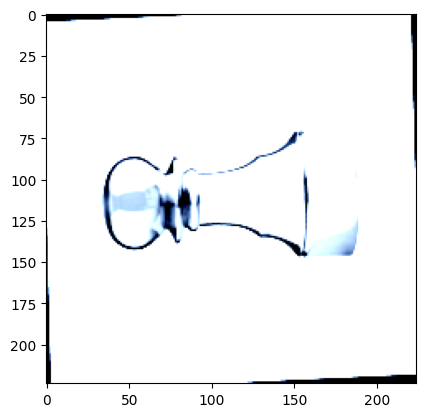

In [48]:
plt.imshow(training_data[4][0].transpose(0, 2).numpy())

In [49]:
for img, label in training_data:
    print(f"Image shape: {img.shape}, Label: {label}")
    break  # Just show the first image and label

Image shape: torch.Size([3, 224, 224]), Label: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2565577].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to

Batch of images shape: torch.Size([32, 3, 224, 224]), Batch of labels shape: torch.Size([32])


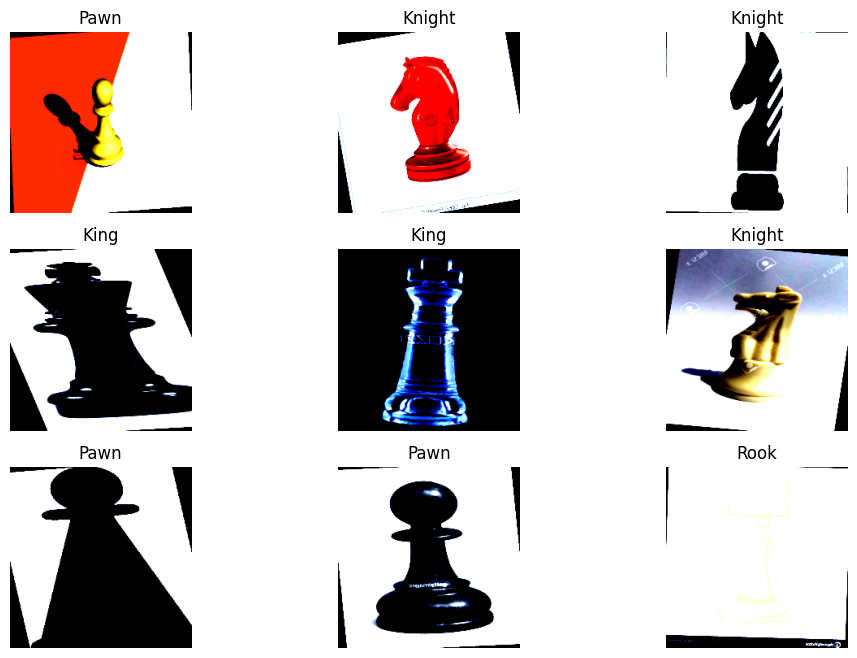

In [50]:
# Display the number of images in the dataset
# Visualize some images from the dataset
def show_images(images, labels, classes):
    plt.figure(figsize=(12, 8))
    for i in range(min(len(images), 9)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).numpy())
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.show()


for images, labels in training_data_loader:
    print(f"Batch of images shape: {images.shape}, Batch of labels shape: {labels.shape}")
    show_images(images, labels, training_data.classes)
    break  # Just show the first batch
# Show some images from the dataset 

#### Step 2: Create the training classifier model

In [ ]:
224*224, 16*56*56

(50176, 50176)

In [51]:
class SimpleChessManCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.features = nn.Sequential(
                nn.Conv2d(3, 6, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
               
                nn.Conv2d(6, 16, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(16 * 56 * 56, 120),  # Adjusted for input size
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, num_classes),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    
    

In [70]:
from torchvision.models import AlexNet
import torch.optim as optim
import torch.nn as nn
model = AlexNet(num_classes=6)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### Step 3: Initialize model, loss function and optimizer

In [54]:
# Check for GPU availability
device = torch.accelerator.current_accelerator() \
         if torch.accelerator.is_available() else torch.device("cpu")

model = SimpleChessManCNN(num_classes=training_data.num_classes).to(device)

loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [61]:
print(sum([ param.numel() for param in model.parameters() if param.requires_grad]))

6032962


#### Step 4: Train the model

In [ ]:
pretrained_model = models.resnet18(weights="DEFAULT")
class ChessManResNet(nn.Module):
    def __init__(self, pretrained_model, num_classes):
        super().__init__()
        self.resnet = pretrained_model
        self.features = nn.Sequential(*list(pretrained_model.children())[:-1])
        self.classifier = nn.Linear(pretrained_model.fc.in_features, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = ChessManResNet(pretrained_model, training_data.num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [104]:
model = models.efficientnet_b6(weights="DEFAULT")
model.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=True)
  (1): Linear(in_features=2304, out_features=1000, bias=True)
)

In [111]:
import torchvision.models as models
#pretrained_model = models.alexnet(weights="AlexNet_Weights.IMAGENET1K_V1")
pretrained_model = models.efficientnet_b6(weights="DEFAULT")
class ChessManEfficientNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.base_model = pretrained_model

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        self.base_model.classifier[-1] = nn.Linear(2304, training_data.num_classes)

    def forward(self, x):
        return self.base_model(x)

model = ChessManEfficientNet().to(device)

loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [112]:
model.base_model.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=True)
  (1): Linear(in_features=2304, out_features=6, bias=True)
)

In [125]:
from tqdm.notebook import tqdm, trange

def train_model(model, train_loader, test_loader, loss_fn, optimizer, num_epochs=5):
    best_accuracy = 0
    for epoch in trange(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        #print(f"\rEpoch [{epoch+1}/{num_epochs}], Training Loss: {running_loss/len(train_loader):.8f}", end="")
        tqdm.write(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {running_loss/len(train_loader):.8f}")

        model.eval()
        
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in tqdm(test_loader, leave=False):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            accuracy = 100 * correct / total
            tqdm.write(f"Accuracy: {accuracy:4.2f}%")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                # Save the model checkpoint
                torch.save(model.state_dict(), "../best_model.pth")
        print(f"Best accuracy: {best_accuracy:4.2f}%")

train_model(model, training_data_loader, testing_data_loader, loss_fn, optimizer, num_epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/20], Training Loss: 1.74472922


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 56.36%
Best accuracy: 56.36%
Epoch [2/20], Training Loss: 1.49789778


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 56.36%
Best accuracy: 56.36%
Epoch [3/20], Training Loss: 1.33270741


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 60.00%
Best accuracy: 60.00%
Epoch [4/20], Training Loss: 1.20053788


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 56.36%
Best accuracy: 60.00%
Epoch [5/20], Training Loss: 1.10718789


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 54.55%
Best accuracy: 60.00%
Epoch [6/20], Training Loss: 1.02547222


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 61.82%
Epoch [7/20], Training Loss: 0.96372056


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 60.00%
Best accuracy: 61.82%
Epoch [8/20], Training Loss: 0.90470016


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 61.82%
Epoch [9/20], Training Loss: 0.83042866


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 61.82%
Epoch [10/20], Training Loss: 0.79770384


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 61.82%
Epoch [11/20], Training Loss: 0.75039212


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 61.82%
Epoch [12/20], Training Loss: 0.75380007


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 63.64%
Best accuracy: 63.64%
Epoch [13/20], Training Loss: 0.69315818


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 63.64%
Epoch [14/20], Training Loss: 0.69628261


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 63.64%
Epoch [15/20], Training Loss: 0.66295022


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 63.64%
Epoch [16/20], Training Loss: 0.65118488


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 58.18%
Best accuracy: 63.64%
Epoch [17/20], Training Loss: 0.60906801


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 60.00%
Best accuracy: 63.64%
Epoch [18/20], Training Loss: 0.59205375


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 63.64%
Epoch [19/20], Training Loss: 0.56217188


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 61.82%
Best accuracy: 63.64%
Epoch [20/20], Training Loss: 0.54981752


  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 63.64%
Best accuracy: 63.64%


In [100]:

def evaluate_model(model, test_loader):
    correct = 0
    total = 0

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:4.2f}%")
evaluate_model(model, validate_data_loader)

  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy: 94.55%


In [29]:
torch.save(model.state_dict, "../chess_model.pth")


In [32]:
model.load_state_dict(torch.load("../chess_model.pth", weights_only=False)())

<All keys matched successfully>

### Transfer-Learning Approaches

#### Pre-trained Models

Using a pre-trained model involves initializing our model with parameters that have already been trained for a certain task - usually not the exact same task we are trying to do ourselves.

Torchvision has ways to easily download a pre-trained model. We simply import the `torchvision.models` package, specify which model we want to use and then pass the argument `pretrained = True` (deprecated since PyTorch 2.7) or `weights = MODEL_WEIGHT`. We can see a list of all available pre-trained models provided by torchvision [here](https://pytorch.org/vision/stable/models.html). 


#### Transfer Learning using builtin PyTorch pretrained models

In [72]:
import torchvision.models as models

# List available models
all_models = models.list_models()
#all_models = models.list_models(module=models)
print(type(all_models))
print(len(all_models), "models available")
print(*all_models, sep="\n")

<class 'list'>
121 models available
alexnet
convnext_base
convnext_large
convnext_small
convnext_tiny
deeplabv3_mobilenet_v3_large
deeplabv3_resnet101
deeplabv3_resnet50
densenet121
densenet161
densenet169
densenet201
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
efficientnet_b4
efficientnet_b5
efficientnet_b6
efficientnet_b7
efficientnet_v2_l
efficientnet_v2_m
efficientnet_v2_s
fasterrcnn_mobilenet_v3_large_320_fpn
fasterrcnn_mobilenet_v3_large_fpn
fasterrcnn_resnet50_fpn
fasterrcnn_resnet50_fpn_v2
fcn_resnet101
fcn_resnet50
fcos_resnet50_fpn
googlenet
inception_v3
keypointrcnn_resnet50_fpn
lraspp_mobilenet_v3_large
maskrcnn_resnet50_fpn
maskrcnn_resnet50_fpn_v2
maxvit_t
mc3_18
mnasnet0_5
mnasnet0_75
mnasnet1_0
mnasnet1_3
mobilenet_v2
mobilenet_v3_large
mobilenet_v3_small
mvit_v1_b
mvit_v2_s
quantized_googlenet
quantized_inception_v3
quantized_mobilenet_v2
quantized_mobilenet_v3_large
quantized_resnet18
quantized_resnet50
quantized_resnext101_32x8d
quantized_resnext1

In [74]:

# Initialize models
m1 = models.get_model("alexnet", weights=None)
m2 = models.get_model("alexnet", weights="DEFAULT")
print(m2)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [75]:
models.get_model_weights("alexnet")

<enum 'AlexNet_Weights'>

In [78]:
print(list(models.get_model_weights("efficientnet_b6")))

[EfficientNet_B6_Weights.IMAGENET1K_V1]


In [76]:
# Fetch weights
weights = models.get_model_weights("alexnet")   
print(list(weights))


[AlexNet_Weights.IMAGENET1K_V1]


In [ ]:

weights = models.get_weight("AlexNet_Weights.IMAGENET1K_V1")
assert weights == models.AlexNet_Weights.IMAGENET1K_V1


In [79]:
training_data.classes

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [81]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim

model = models.alexnet(weights='IMAGENET1K_V1')
for i, layer in enumerate(model.features, 1):
    print(f"Layer {i}:\n\t{layer}")

Layer 1:
	Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
Layer 2:
	ReLU(inplace=True)
Layer 3:
	MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
Layer 4:
	Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Layer 5:
	ReLU(inplace=True)
Layer 6:
	MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
Layer 7:
	Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Layer 8:
	ReLU(inplace=True)
Layer 9:
	Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Layer 10:
	ReLU(inplace=True)
Layer 11:
	Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Layer 12:
	ReLU(inplace=True)
Layer 13:
	MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)


In [82]:

num_ftrs = model.classifier[6].in_features
print(num_ftrs)

4096


In [ ]:

model.classifier[6] = nn.Linear(num_ftrs, training_data.num_classes)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

step_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
import torchvision.models as models
#pretrained_model = models.alexnet(weights="AlexNet_Weights.IMAGENET1K_V1")
pretrained_model = models.resnet18(weights="DEFAULT")
class ChessManAlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.base_model = pretrained_model

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        self.base_model.classifier[6] = nn.Linear(4096, training_data.num_classes)  # Change the final fully connected layer for 10 classes

    def forward(self, x):
        return self.base_model(x)

model = ChessManAlexNet().to(device)


loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [82]:
def train_model(model, train_loader, loss_fn, optimizer, num_epochs=5):
    model.train()
    for epoch in trange(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f"\rEpoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.8f}", end="")
    print()
train_model(model, training_data_loader, loss_fn, optimizer, num_epochs=8)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/8], Loss: 0.43661039


In [92]:
model = models.resnet50(weights="DEFAULT")
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [93]:
pretrained_model = models.resnet50(weights="DEFAULT")
class ChessManResNet(nn.Module):
    def __init__(self, pretrained_model, num_classes):
        super().__init__()
        self.resnet = pretrained_model
        self.features = nn.Sequential(*list(pretrained_model.children())[:-1])
        self.classifier = nn.Linear(pretrained_model.fc.in_features, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = ChessManResNet(pretrained_model, training_data.num_classes).to(device)

In [ ]:
def train_model(model, train_loader, loss_fn, optimizer, num_epochs=5):
    model.train()
    for epoch in trange(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f"\rEpoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.8f}", end="")

train_model(model, training_data_loader, loss_fn, optimizer, num_epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [20/20], Loss: 0.02201636

In [83]:

def evaluate_model(model, test_loader):
    correct = 0
    total = 0

    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:4.2f}%")
evaluate_model(model, testing_data_loader)

Accuracy: 76.36%


### Transfer Learning using ```timm```

In [33]:
# pip install timm
# conda install timm -y

In [114]:
import timm

In [115]:
#[ t for t in timm.list_models(pretrained=True) if t.startswith("resnet") ]
timm.list_models()

['aimv2_1b_patch14_224',
 'aimv2_1b_patch14_336',
 'aimv2_1b_patch14_448',
 'aimv2_3b_patch14_224',
 'aimv2_3b_patch14_336',
 'aimv2_3b_patch14_448',
 'aimv2_huge_patch14_224',
 'aimv2_huge_patch14_336',
 'aimv2_huge_patch14_448',
 'aimv2_large_patch14_224',
 'aimv2_large_patch14_336',
 'aimv2_large_patch14_448',
 'bat_resnext26ts',
 'beit3_base_patch16_224',
 'beit3_giant_patch14_224',
 'beit3_giant_patch14_336',
 'beit3_large_patch16_224',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_sma

In [119]:
timm.list_models("resnet*", pretrained=True)

['resnet10t.c3_in1k',
 'resnet14t.c3_in1k',
 'resnet18.a1_in1k',
 'resnet18.a2_in1k',
 'resnet18.a3_in1k',
 'resnet18.fb_ssl_yfcc100m_ft_in1k',
 'resnet18.fb_swsl_ig1b_ft_in1k',
 'resnet18.gluon_in1k',
 'resnet18.tv_in1k',
 'resnet18d.ra2_in1k',
 'resnet18d.ra4_e3600_r224_in1k',
 'resnet26.bt_in1k',
 'resnet26d.bt_in1k',
 'resnet26t.ra2_in1k',
 'resnet32ts.ra2_in1k',
 'resnet33ts.ra2_in1k',
 'resnet34.a1_in1k',
 'resnet34.a2_in1k',
 'resnet34.a3_in1k',
 'resnet34.bt_in1k',
 'resnet34.gluon_in1k',
 'resnet34.ra4_e3600_r224_in1k',
 'resnet34.tv_in1k',
 'resnet34d.ra2_in1k',
 'resnet50.a1_in1k',
 'resnet50.a1h_in1k',
 'resnet50.a2_in1k',
 'resnet50.a3_in1k',
 'resnet50.am_in1k',
 'resnet50.b1k_in1k',
 'resnet50.b2k_in1k',
 'resnet50.bt_in1k',
 'resnet50.c1_in1k',
 'resnet50.c2_in1k',
 'resnet50.d_in1k',
 'resnet50.fb_ssl_yfcc100m_ft_in1k',
 'resnet50.fb_swsl_ig1b_ft_in1k',
 'resnet50.gluon_in1k',
 'resnet50.ra_in1k',
 'resnet50.ram_in1k',
 'resnet50.tv2_in1k',
 'resnet50.tv_in1k',
 'resne

In [121]:
m = timm.create_model("efficientnet_b0", pretrained=True)
g = m.children()


In [122]:
layers = m.children()
for i, layer in enumerate(layers, 1):
    print(f"Layer {i}:\n\t{layer}")

Layer 1:
	Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
Layer 2:
	BatchNormAct2d(
  32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
  (drop): Identity()
  (act): SiLU(inplace=True)
)
Layer 3:
	Sequential(
  (0): Sequential(
    (0): DepthwiseSeparableConv(
      (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn1): BatchNormAct2d(
        32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): SiLU(inplace=True)
      )
      (aa): Identity()
      (se): SqueezeExcite(
        (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
        (act1): SiLU(inplace=True)
        (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        (gate): Sigmoid()
      )
      (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNormAct2d(
        16, eps=1e-05, momentum=0.1, affine

In [ ]:
6 * 224

1344

In [124]:
import timm
class SimpleChessManClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.base_model = timm.create_model("efficientnet_b0", pretrained=True, num_classes=num_classes)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        for param in self.base_model.parameters():
            param.requires_grad = False

        enet_out_size = 1280  # EfficientNet-B0 output size
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = SimpleChessManClassifier(num_classes=training_data.num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [52]:
# Check for GPU availability
device = torch.accelerator.current_accelerator() \
         if torch.accelerator.is_available() else torch.device("cpu")

model = SimpleChessManClassifier(num_classes=training_data.num_classes).to(device)

loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [53]:
# Freezing a pretrained model
for child in model.base_model.children():
    child.requires_grad = False
    


In [55]:
layers = m.children()
for i, layer in enumerate(layers, 1):
    print(f"Layer {i}:\n\t{layer}")

Layer 1:
	Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
Layer 2:
	BatchNormAct2d(
  32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
  (drop): Identity()
  (act): SiLU(inplace=True)
)
Layer 3:
	Sequential(
  (0): Sequential(
    (0): DepthwiseSeparableConv(
      (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn1): BatchNormAct2d(
        32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): SiLU(inplace=True)
      )
      (aa): Identity()
      (se): SqueezeExcite(
        (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
        (act1): SiLU(inplace=True)
        (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        (gate): Sigmoid()
      )
      (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn2): BatchNormAct2d(
        16, eps=1e-05, momentum=0.1, affine

In [56]:
def train_model(model, train_loader, loss_fn, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.8f}")

train_model(model, training_data_loader, loss_fn, optimizer, num_epochs=10)

Epoch [1/10], Loss: 1.23046110
Epoch [2/10], Loss: 0.34463944
Epoch [3/10], Loss: 0.20033614
Epoch [4/10], Loss: 0.08984623
Epoch [5/10], Loss: 0.08266934
Epoch [6/10], Loss: 0.13486153
Epoch [7/10], Loss: 0.16942181
Epoch [8/10], Loss: 0.12311725
Epoch [9/10], Loss: 0.09173383
Epoch [10/10], Loss: 0.05067367


In [57]:

def evaluate_model(model, test_loader):
    correct = 0
    total = 0

    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:4.2f}%")
evaluate_model(model, testing_data_loader)

Accuracy: 94.55%


In [ ]:
len(timm.list_models(pretrained=True))

1599

##### Visualizing transforms

In [ ]:
from PIL import Image
img = Image.open('data/Chessman-image-dataset/Chess/King/00000061.jpg')


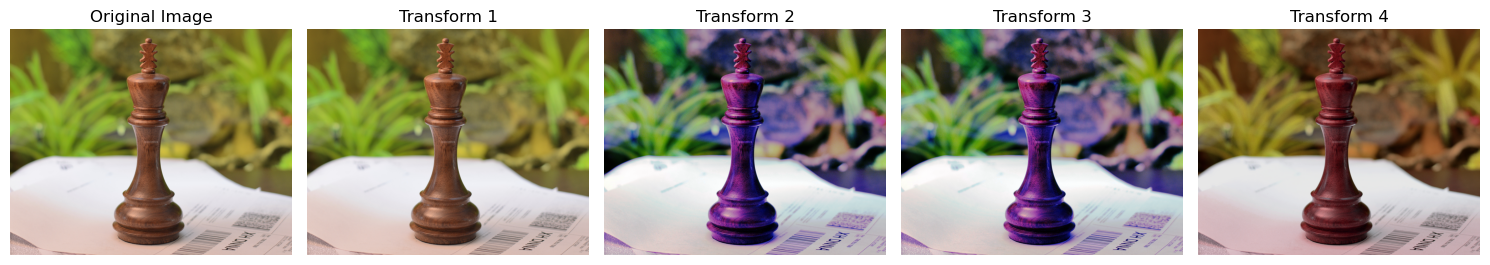

In [ ]:
import PIL.ImagePath
import torchvision.transforms.functional as tvf
import PIL
import torchvision.transforms as transforms

def visualize_transforms(image, transforms):
    fig, axes = plt.subplots(1, len(transforms) + 1, figsize=(15, 5))
    axes[0].imshow(tvf.to_pil_image(image))
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    for i, transform in enumerate(transforms):
        transformed_image = transform(image)
        axes[i + 1].imshow(tvf.to_pil_image(transformed_image))
        axes[i + 1].set_title(f"Transform {i + 1}")
        axes[i + 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage of visualize_transforms
#example_image, _ = training_data[90]
example_image = transforms.PILToTensor()(PIL.Image.open('data/Chessman-image-dataset/Chess/King/00000061.jpg'))
#example_image = tvf.convert_image_dtype(example_image, dtype=torch.float32)
transforms_list = [
    tvf.autocontrast,
    tvf.equalize,
    transforms.AutoAugment(
        transforms.AutoAugmentPolicy.IMAGENET,
        interpolation=PIL.Image.BILINEAR
    ),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
]
visualize_transforms(example_image, transforms_list)

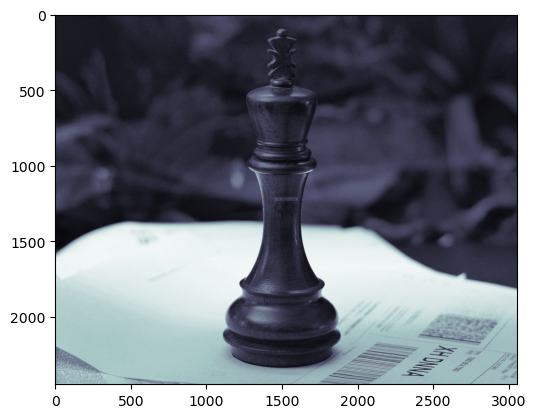

In [ ]:
plt.imshow(example_image[2], cmap="bone")

In [ ]:
#print(example_image.float())
mean, std = example_image.float()[0].mean(), example_image.float()[0].std()
(example_image - mean) / std

tensor([[[-0.6673, -0.6486, -0.6112,  ..., -0.5737, -0.5175, -0.5550],
         [-0.6486, -0.6486, -0.6299,  ..., -0.5924, -0.6112, -0.5363],
         [-0.5737, -0.6112, -0.6112,  ..., -0.5550, -0.5550, -0.5924],
         ...,
         [ 1.2239,  1.3363,  1.3924,  ...,  1.1116,  1.1116,  1.1116],
         [ 1.2614,  1.3550,  1.3924,  ...,  1.1116,  1.1116,  1.1116],
         [ 1.2239,  1.2988,  1.3363,  ...,  1.1116,  1.1116,  1.1116]],

        [[-1.0606, -1.0418, -1.0044,  ..., -0.4239, -0.3677, -0.4426],
         [-1.0418, -1.0418, -1.0231,  ..., -0.4426, -0.4614, -0.4239],
         [-0.9669, -1.0044, -1.0044,  ..., -0.4426, -0.4052, -0.4426],
         ...,
         [ 0.6996,  0.8307,  0.8869,  ...,  0.6434,  0.6622,  0.6434],
         [ 0.7558,  0.8494,  0.8869,  ...,  0.6434,  0.6622,  0.6434],
         [ 0.7183,  0.7932,  0.7932,  ...,  0.6434,  0.6622,  0.6434]],

        [[-2.3152, -2.2964, -2.2590,  ..., -2.3152, -2.2590, -2.2777],
         [-2.2964, -2.2964, -2.2777,  ..., -2

In [ ]:
fn = transforms.Normalize([100., 100., 100.], [25., 78., 28])
fn(example_image.float())

tensor([[[ 0.6400,  0.6800,  0.7600,  ...,  0.8400,  0.9600,  0.8800],
         [ 0.6800,  0.6800,  0.7200,  ...,  0.8000,  0.7600,  0.9200],
         [ 0.8400,  0.7600,  0.7600,  ...,  0.8800,  0.8800,  0.8000],
         ...,
         [ 4.6800,  4.9200,  5.0400,  ...,  4.4400,  4.4400,  4.4400],
         [ 4.7600,  4.9600,  5.0400,  ...,  4.4400,  4.4400,  4.4400],
         [ 4.6800,  4.8400,  4.9200,  ...,  4.4400,  4.4400,  4.4400]],

        [[-0.0641, -0.0513, -0.0256,  ...,  0.3718,  0.4103,  0.3590],
         [-0.0513, -0.0513, -0.0385,  ...,  0.3590,  0.3462,  0.3718],
         [ 0.0000, -0.0256, -0.0256,  ...,  0.3590,  0.3846,  0.3590],
         ...,
         [ 1.1410,  1.2308,  1.2692,  ...,  1.1026,  1.1154,  1.1026],
         [ 1.1795,  1.2436,  1.2692,  ...,  1.1026,  1.1154,  1.1026],
         [ 1.1538,  1.2051,  1.2051,  ...,  1.1026,  1.1154,  1.1026]],

        [[-2.5714, -2.5357, -2.4643,  ..., -2.5714, -2.4643, -2.5000],
         [-2.5357, -2.5357, -2.5000,  ..., -2

#### Transfer Learning: Feature Extraction

In [7]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load a pretrained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all parameters
for param in model.parameters():
   param.requires_grad = False

# Replace the final fully connected layer
# ResNet-18 has 512 output features in the last layer before classification
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10) # 10 classes for our task

# Now only model.fc parameters will be trained
# Only this layer will have requires_grad=True
print("Trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

# Define optimizer that only updates the final layer weights
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)


Trainable parameters: 5130


/Users/chandra/.local/share/virtualenvs/Notebooks-nyz_tjgx/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### Fine-tuning with ResNet

In [10]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load a pretrained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze early layers (first 6 out of 8 layers)
# ResNet has 4 layer groups + final fc layer
children = list(model.children())
for child in children[:6]: # Freeze first 6 layers
   for param in child.parameters():
       param.requires_grad = False

# Replace the final fully connected layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10) # 10 classes for our task

# Create parameter groups with different learning rates
# Lower learning rate for pre-trained layers, higher for new layers
optimizer = torch.optim.SGD([
   {'params': [p for n, p in model.named_parameters() if 'fc' not in n and p.requires_grad], 
    'lr': 0.0001},
   {'params': model.fc.parameters(), 'lr': 0.001}
], momentum=0.9)
# Now only model.fc parameters will be trained with higher learning rate
print("Trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))   

Trainable parameters: 10498570


/Users/chandra/.local/share/virtualenvs/Notebooks-nyz_tjgx/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/chandra/.local/share/virtualenvs/Notebooks-nyz_tjgx/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### Exercise: Transfer Learning Image Classifier

In [ ]:
# Build a complete image classifier using transfer learning with a pre-trained ResNet-50.
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# TODO: Set up data transformations for training and validation
train_transform = transforms.Compose([
    # TODO: Add data augmentation (resize, random crop, flip, normalize)
])

val_transform = transforms.Compose([
    # TODO: Add validation transformations (resize, center crop, normalize)
])

# TODO: Load dataset (e.g., CIFAR-10) with transforms
# train_dataset = ...
# val_dataset = ...
# train_loader = ...
# val_loader = ...

# TODO: Load pretrained ResNet-50 and modify for your dataset
# model = ...

# TODO: Define loss function and optimizer
# criterion = ...
# optimizer = ...

# TODO: Write training loop
# def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
# ...

#### Transfer Learning Image Classifier Solution

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Set up data transformations
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                download=True, transform=train_transform)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                download=True, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

# Load pretrained ResNet-50
model = torchvision.models.resnet50(pretrained=True)

# Freeze early layers
for param in list(model.parameters())[:-20]:
    param.requires_grad = False

# Modify final fully connected layer for CIFAR-10 (10 classes)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD([
     {'params': [p for n, p in model.named_parameters() if 'fc' not in n and p.requires_grad],
      'lr': 1e-4},
     {'params': model.fc.parameters(), 'lr': 1e-3}
], momentum=0.9)

def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    best_acc = 0.0
 
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
 
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
 
            # Zero the gradients
            optimizer.zero_grad()
 
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
 
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
 
            running_loss += loss.item() * inputs.size(0)
 
            epoch_loss = running_loss / len(train_loader.dataset)
 
        # Validation phase
        model.eval()
        correct = 0
        total = 0
 
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
 
                val_acc = correct / total
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Validation Acc: {val_acc:.4f}')
 
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')
 
    return model

# Train the model
trained_model = train(model, train_loader, val_loader, criterion, optimizer, num_epochs=5)

### Advanced CNN Architectures

#### VGG - Visual Geometry Group

VGG, short for Visual Geometry Group, refers to a family of deep convolutional neural network architectures developed by the Visual Geometry Group at the University of Oxford. Specifically, VGG-16 and VGG-19 are widely recognized and used, particularly for transfer learning in tasks like image classification and face recognition. 

VGG is a neural network model that uses convolutional neural network (CNN) layers and was designed for the [ImageNet challenge](http://www.image-net.org/challenges/LSVRC/), which it won in 2014.

VGG is not a single model, but a family of models that are all similar but have different *configurations*. Each configuration specifies the number of layers and the size of each layer. The configurations are listed in table 1 of the [VGG paper](https://arxiv.org/pdf/1409.1556.pdf) and denoted by a letter, although recently they are just referred to as the number of layers with weights in the model, e.g. configuration "A" has 11 layers with weights so is known as VGG11.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/vgg-table.png?raw=1)

Below is the architecture of configuration "D", also known as VGG16, for a 224x224 color image.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/vgg.png?raw=1)

The other commonly used VGG variants are VGG11, VGG13 and VGG19, which correspond to configurations "A", "B", and "E". Configurations "A-LRN" and "C" - which is the same as "D" but with smaller filter sizes in some convolutional layers - are rarely used.

Usually we will initialize our weights randomly - following some weight initialization scheme - and then train our model. Using a pre-trained model means some - potentially all - of our model's weights are not initialized randomly, but instead taken from a copy of our model that has already been trained on some task. The task the model has been pre-trained on does not necessarily have to match the "downstream task" - the task we want to use the pre-trained model on. For example, a model that has been trained to classify images can then be used to detect objects within an image.

The theory is that these pre-trained models have already learned high level features within images that will be useful for our task. This means we don't have to learn them from scratch when using the pre-trained model for our task, causing our model to converge earlier. We can also think of the pre-trained model as being a very good set of weights to initialize our model from, and using pre-trained models usually leads to a performance improvement compared to initializing our weights randomly. 

The act of using a pre-trained model is generally known as *transfer learning*, as we are learning to transfer knowledge from one task to another. It is also referred to as *fine-tuning*, as we fine-tune our parameters trained on one task to the new, downstream task. The terms *transfer learning* and *fine-tuning* are used interchangeably in machine learning. 

### Defining the Model

Usually the next thing we'd do is load our data, however this is quite different when using a pre-trained model, so we'll first introduce the VGG architecture and then show how to load a pre-trained VGG model.

Below is the general VGG model. This is the part of VGG that is common for all VGG configurations. The only part that depends on the configuration is the `features`, which we will pass as an argument when we construct the VGG model.

The only new feature introduced here in the `AdaptiveAvgPool2d`. As well as the standard `AvgPool` and `MaxPool` layers, PyTorch has "adaptive" versions of those layers. In adaptive pooling layers we specify the desired output size of the pooling layer instead of the size of the filter used by the pooling layer. Here, we want an output size of 7x7. We know that all VGG configurations end with a convolutional layer that has 512 filters, thus if our `features` layer for each configuration always has a size of 7x7 we do not have to change the `classifier` for each VGG configuration. The advantage of using adaptive layers is that it allows us to apply our model to images of different sizes - down to a minimum size, which is 32x32 in VGG models.

**Note:** even though VGG net can handle images as small as 32x32 it is designed to give optimal performance for larger images. 

How do the adaptive pooling layers calculate the size of their filters? For each dimension, i.e. height and width, we calculate:

```
filter_size = (input_size + desired_size - 1) // desired_size
```

`//` means we round down to the nearest integer. So, if we wanted to filter a 32x32 image to 7x7 we would have a 6x6 filter. When the filter is applied to the image it will need to overlap at some points, i.e. some pixels will be covered by the filter twice. To calculate the positions of the filter we split the 32x32 image into `desired_size` evenly spaced points. 

This can be calculated with `np.linspace(0, input_size - desired_size, desired_size)` which for our example gives us: `[0, 4.16666667, 8.33333333, 12.5, 16.66666667, 20.83333333, 25]`. We then round each of these points down to the nearest integer as we cannot have a filter cover a fraction of a pixel, which gives us: `[0, 4, 8, 12, 16, 20, 25]`. Thus, the 6x6 filter covers pixels: 0-5, 4-10, 8-14, 12-18, 16-22, 20-26 and 25-31 in each dimension.

Let's define the VGG base architecture. 

In [ ]:
class VGG(nn.Module):
    def __init__(self, features, output_dim):
        super().__init__()

        self.features = features

        self.avgpool = nn.AdaptiveAvgPool2d(7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

Next up is calculating the `features` for each VGG configuration.

Typically the VGG configurations are defined as lists. Each item in the list is either 'M', which denotes a max pooling layer, or an integer, which denotes a convolutional layer with that many filters.

Below are the configurations for VGG11, VGG13, VGG16 and VGG19. Otherwise known as configurations "A", "B", "D" and "E", respectively.

In [ ]:
vgg11_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg13_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512,
                512, 'M']

vgg16_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,
                'M', 512, 512, 512, 'M']

vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
                512, 512, 'M', 512, 512, 512, 512, 'M']

In [ ]:
def get_vgg_layers(config, batch_norm):

    layers = []
    in_channels = 3

    for c in config:
        assert c == 'M' or isinstance(c, int)
        if c == 'M':
            layers += [nn.MaxPool2d(kernel_size=2)]
        else:
            conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = c

    return nn.Sequential(*layers)

In [ ]:
vgg11_layers = get_vgg_layers(vgg11_config, batch_norm=True)

In [ ]:
print(vgg11_layers)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU(inplace=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU(inplace=True)
  (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): ReLU(inplace=True)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, cei

We can then pass these `features` to our base VGG module to get our VGG11 model.

In [ ]:
OUTPUT_DIM = 10

model = VGG(vgg11_layers, OUTPUT_DIM)

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [ ]:
import torchvision.models as models

pretrained_model = models.vgg11_bn(pretrained=True)

print(pretrained_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

As we can see, the pre-trained model loaded is exactly the same as the one we have defined with one exception - the output of the final linear layer. 

All of torchvision's pre-trained models are trained as image classification models on the [ImageNet](http://www.image-net.org/challenges/LSVRC/) dataset. A dataset of 224x224 color images with 1000 classes, therefore the final layer will have a 1000 dimensional output.

We can get the last layer specifically by indexing into the `classifier` layer of the pre-trained model.

In [ ]:
pretrained_model.classifier[-1]

Linear(in_features=4096, out_features=1000, bias=True)

As our dataset, CIFAR10, only has 10 classes then we want the last layer to have a 10 dimensional output. 

We'll define a new final linear layer which has to have an input size equal to that of the layer we are replacing - as it's input will be the 4096 dimensional output from the previous linear layer in the classifier. The output of this linear layer will be 10 dimensions - as our dataset has 10 classes.

In [ ]:
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

We can directly overwrite the previous linear layer with our new linear layer. 

Note that our `final_fc` will be initialized randomly. It is the only part of our model with its parameters not pre-trained.

In [ ]:
pretrained_model.classifier[-1] = final_fc

We can then print out the `classifier` of our model to ensure the final linear layer now has an output dimension of 10.

In [ ]:
print(pretrained_model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


We could go ahead and use the `pretrained_model` module from here on out, however it only returns the final output layer and not the intermediate representation as our `model` does. We can see that in the model's definition [here](https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py#L47). 

We can load the parameters of the `pretrained_model` into our `model` by loading the parameters (`state_dict`) from the `pretrained_model` into our `model` in the same way we loaded the "best" saved parameters in the previous notebooks - by using `load_state_dict`. However, this time we load directly from the `pretrained_model` instead of using `torch.load` on the path of the saved model parameters. 

This is only possible as our `model` has the exact same layers (order and shape) as the `pretrained_model` with the final linear layer replaced with our 10 dimensional output linear layer.

In [ ]:
model.load_state_dict(pretrained_model.state_dict())

<All keys matched successfully>

This model has considerably more parameters than the previous model, AlexNet - 128M compared to 23M.

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 128,812,810 trainable parameters


Instead of training all the parameters we have loaded from a pre-trained model, we could instead only learn some of them and leave some "frozen" at their pre-trained values. As our model will then have less trainable parameters it will usually train faster and we can usually fit it on smaller GPUs. 

We aren't going to freeze any parameters in this notebook, but if we wanted to freeze the `features` layer then we could do that with:

```python
for parameter in model.features.parameters():
    parameter.requires_grad = False
```

We could also freeze the `classifier` layer, however we always want to train the last layer as this is what we have initialized randomly and needs to be trained. Freezing all but the last layer in the `classifier` can be done with:

```python
for parameter in model.classifier[:-1].parameters():
    parameter.requires_grad = False
```

---

#### ResNet - Residual Network

ResNet, short for Residual Network, is a type of deep learning architecture that uses "skip connections" (also known as residual connections) to overcome the vanishing gradient problem and enable the training of extremely deep convolutional neural networks. These connections allow the network to learn residual functions, effectively allowing the network to skip or bypass layers during the forward pass. 

ResNet, like VGG, also has multiple *configurations* which specify the number of layers and the sizes of those layers. Each layer is made out of *blocks*, which are made up of convolutional layers, batch normalization layers and *residual connections* (also called *skip connections* or *shortcut connections*). Confusingly, ResNets use the term "layer" to refer to both a set of blocks, e.g. "layer 1 has two blocks", and also the total number of layers within the entire ResNet, e.g. "ResNet18 has 18 layers".

A residual connection is simply a direct connection between the input of a block and the output of a block. Sometimes the residual connection has layers in it, but most of the time it does not. Below is an example block with an identity residual connection, i.e. no layers in the residual path.

![image](./resnet-skip.png)

The different ResNet configurations are known by the total number of layers within them - ResNet18, ResNet34, ResNet50, ResNet101 and ResNet152. 

![image](./resnet-table.png)

From the table above, we can see that for ResNet18 and ResNet34 that the first block contains two 3x3 convolutional layers with 64 filters, and that ResNet18 has two of these blocks in the first layer, whilst Resnet34 has three. ResNet50, ResNet101 and ResNet152 blocks have a different structure than those in ResNet18 and ResNet34, and these blocks are called *bottleneck* blocks. Bottleneck blocks reduce the number of number of channels within the input before expanding them back out again. Below shows a standard *BasicBlock* (left) - used by ResNet18 and ResNet34 - and the *Bottleneck* block used by ResNet50, ResNet101 and ResNet152.

![image](./resnet-blocks.png)

Why do ResNets work? The key is in the residual connections. Training incredibly deep neural networks is difficult due to the gradient signal either exploding (becoming very large) or vanishing (becoming very small) as it gets backpropagated through many layers. Residual connections allow the model to learn how to "skip" layers - by setting all their weights to zero and only rely on the residual connection. Thus, in theory, if your ResNet152 model can actually learn the desired function between input and output by only using the first 52 layers the remaining 100 layers should set their weights to zero and the output of the 52nd layer will simply pass through the residual connections unhindered. This also allows for the gradient signal to also backpropagate through those 100 layers unhindered too. This outcome could also also be achieved in a network without residual connections, the "skipped" layers would learn to set their weights to one, however adding the residual connection is more explicit and is easier for the model to learn to use these residual connections.


Generative Adversarial Networks (GANs) are a type of deep learning architecture that use two neural networks – a **generator** and a **discriminator** – to generate new data that resembles a given training dataset. The generator creates new data samples, while the discriminator tries to distinguish between real and generated data. This adversarial process forces the generator to produce increasingly realistic data, eventually fooling the discriminator. 

![image](./Schematic-of-the-generative-adversarial-network-GAN-method-A-GAN-consists-of-2-neural.png)

---

### Introduction to Generative Adversarial Networks (GANs)

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.84MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 103kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 945kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.94MB/s]


Epoch [1/5], Step [1/235], Discriminator Loss: 1.4400, Generator Loss: 1.4528
Epoch [1/5], Step [101/235], Discriminator Loss: 0.0697, Generator Loss: 4.2751
Epoch [1/5], Step [201/235], Discriminator Loss: 0.0294, Generator Loss: 5.0003
Epoch [2/5], Step [1/235], Discriminator Loss: 0.0541, Generator Loss: 4.9287
Epoch [2/5], Step [101/235], Discriminator Loss: 0.0249, Generator Loss: 5.9309
Epoch [2/5], Step [201/235], Discriminator Loss: 0.0212, Generator Loss: 5.2296
Epoch [3/5], Step [1/235], Discriminator Loss: 0.0182, Generator Loss: 5.4204
Epoch [3/5], Step [101/235], Discriminator Loss: 0.0177, Generator Loss: 5.1013
Epoch [3/5], Step [201/235], Discriminator Loss: 0.0183, Generator Loss: 5.7556
Epoch [4/5], Step [1/235], Discriminator Loss: 0.0367, Generator Loss: 6.2966
Epoch [4/5], Step [101/235], Discriminator Loss: 0.0099, Generator Loss: 5.8156
Epoch [4/5], Step [201/235], Discriminator Loss: 0.0147, Generator Loss: 5.7890
Epoch [5/5], Step [1/235], Discriminator Loss: 0

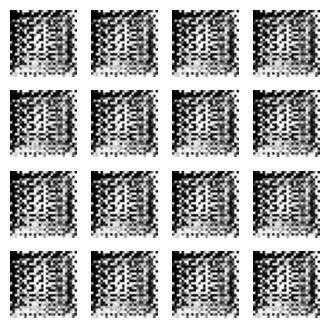

In [126]:
# A Simple PyTorch Example for GAN
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Generator
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super(Generator, self).__init__()
        self.noise_dim = noise_dim
        self.main = nn.Sequential(
            nn.Linear(noise_dim, 7 * 7 * 256),
            nn.ReLU(True),
            nn.Unflatten(1, (256, 7, 7)),
            nn.ConvTranspose2d(256, 128, 5, stride=1, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)


# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, 5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, 5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(128),
            nn.Flatten(),
            nn.Linear(7 * 7 * 128, 1)
        )

    def forward(self, x):
        return self.main(x)


# Noise dimension
NOISE_DIM = 100

# Generator and discriminator
generator = Generator(NOISE_DIM)
discriminator = Discriminator()

# Device configuration
device = torch.device('mps' if torch.mps.is_available() else 'cpu')
generator = generator.to(device)
discriminator = discriminator.to(device)

# Loss function
criterion = nn.BCEWithLogitsLoss()

# Optimizers
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training hyperparameters
NUM_EPOCHS = 5
BATCH_SIZE = 256

# DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = torchvision.datasets.MNIST(root='../Datasets/MNIST', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Training loop
for epoch in range(NUM_EPOCHS):
    for i, data in enumerate(train_loader):
        real_images, _ = data
        real_images = real_images.to(device)

        # Train discriminator with real images
        discriminator_optimizer.zero_grad()
        real_labels = torch.ones(real_images.size(0), 1, device=device)
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)
        real_loss.backward()

        # Train discriminator with fake images
        noise = torch.randn(real_images.size(0), NOISE_DIM, device=device)
        fake_images = generator(noise)
        fake_labels = torch.zeros(real_images.size(0), 1, device=device)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)
        fake_loss.backward()
        discriminator_optimizer.step()

        # Train generator
        generator_optimizer.zero_grad()
        fake_labels = torch.ones(real_images.size(0), 1, device=device)
        fake_outputs = discriminator(fake_images)
        gen_loss = criterion(fake_outputs, fake_labels)
        gen_loss.backward()
        generator_optimizer.step()

        # Print losses
        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{len(train_loader)}], '
                  f'Discriminator Loss: {real_loss.item() + fake_loss.item():.4f}, '
                  f'Generator Loss: {gen_loss.item():.4f}')

# Generate and save images
def generate_and_save_images(model, epoch, noise):
    model.eval()
    with torch.no_grad():
        fake_images = model(noise).cpu()
        fake_images = fake_images.view(fake_images.size(0), 28, 28)

        fig = plt.figure(figsize=(4, 4))
        for i in range(fake_images.size(0)):
            plt.subplot(4, 4, i+1)
            plt.imshow(fake_images[i], cmap='gray')
            plt.axis('off')

        plt.savefig(f'image_at_epoch_{epoch+1:04d}.png')
        plt.show()

# Generate test noise
test_noise = torch.randn(16, NOISE_DIM, device=device)
generate_and_save_images(generator, NUM_EPOCHS, test_noise)

In [ ]:
# DCGAN (Deep Convolutional GAN) example:
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

Random Seed:  999


In [ ]:
# Root directory for dataset
dataroot = "../Datasets/celeba"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [ ]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("mps" if (torch.mps.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [ ]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)

In [ ]:
# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [ ]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

### Recurrent Neural Networks (RNNs)

#### Basic RNN Implementation in PyTorch

In [ ]:
import torch
import torch.nn as nn

# Define a simple RNN cell for one-step processing
class SimpleRNNCell(nn.Module):
  def __init__(self, input_size, hidden_size):
     super(SimpleRNNCell, self).__init__()
     self.hidden_size = hidden_size
 
     # Combined weights for input and hidden state
     self.ih = nn.Linear(input_size, hidden_size)
     self.hh = nn.Linear(hidden_size, hidden_size)
 
  def forward(self, x, h_prev):
     # x: input at current timestep [batch, input_size]
     # h_prev: hidden state from previous timestep [batch, hidden_size]
 
     # Combine input and previous hidden state
     h_next = torch.tanh(self.ih(x) + self.hh(h_prev))
 
     return h_next

# Let's implement a basic RNN
class SimpleRNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
     super(SimpleRNN, self).__init__()
     self.hidden_size = hidden_size
     self.rnn_cell = SimpleRNNCell(input_size, hidden_size)
     self.fc = nn.Linear(hidden_size, output_size)
 
  def forward(self, x):
     # x: input sequence [batch, seq_len, input_size]
     batch_size = x.size(0)
     seq_len = x.size(1)
 
     # Initialize hidden state with zeros
     h = torch.zeros(batch_size, self.hidden_size, device=x.device)
 
     # Process each timestep
     for t in range(seq_len):
         h = self.rnn_cell(x[:, t, :], h)
 
     # Use the final hidden state for prediction
     output = self.fc(h)
     return output
  
  
# Test the SimpleRNN with a dummy input
input_size = 10
hidden_size = 20
output_size = 5

rnn = SimpleRNN(input_size, hidden_size, output_size)

# Create a dummy input sequence
# Shape: [batch_size, seq_len, input_size]
dummy_input = torch.randn(4, 7, input_size)

# Forward pass through the RNN
output = rnn(dummy_input)
print("RNN output shape:", output.shape)
print(output)

RNN output shape: torch.Size([4, 5])
tensor([[-6.4104e-02, -8.7039e-02,  3.7729e-01,  7.6720e-01, -4.8223e-01],
        [-8.7692e-01,  5.8399e-01, -1.3105e-01, -1.9408e-01, -5.1280e-02],
        [-8.1716e-01,  5.0569e-01,  3.1561e-04, -2.6152e-01,  1.2877e-01],
        [ 5.7172e-02,  4.5706e-01, -1.7227e-01, -4.6242e-01,  7.2339e-02]],
       grad_fn=<AddmmBackward0>)


#### Using PyTorch's Built-in RNN Modules

In [ ]:
import torch
import torch.nn as nn

# A complete example using PyTorch's RNN module
class RNNModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
     super(RNNModel, self).__init__()
 
     # RNN layer
     self.rnn = nn.RNN(
                    input_size=input_size,
                    hidden_size=hidden_size,
                    num_layers=num_layers,
                    batch_first=True,
                    dropout=dropout if num_layers > 1 else 0
     )
 
     # Output layer
     self.fc = nn.Linear(hidden_size, output_size)
 
  def forward(self, x):
     # x shape: [batch, seq_len, input_size]
 
     # Initialize hidden state h_0 (default is all zeros)
     # h_0 shape: [num_layers, batch, hidden_size]
     batch_size = x.size(0)
     h_0 = torch.zeros(self.rnn.num_layers, batch_size, 
     self.rnn.hidden_size, device=x.device)
 
     # Forward propagate through RNN
     # out shape: [batch, seq_len, hidden_size]
     # h_n shape: [num_layers, batch, hidden_size]
     out, h_n = self.rnn(x, h_0)
 
     # Use output from the last time step for classification
     # We need the last time step's output for each batch item
     out = self.fc(out[:, -1, :])
 
     return out

#### LSTM Implementation in PyTorch

In [10]:
class LSTMModel(nn.Module):
 def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
    super(LSTMModel, self).__init__()
 
    # LSTM layer
    self.lstm = nn.LSTM(
                  input_size=input_size,
                  hidden_size=hidden_size,
                  num_layers=num_layers,
                  batch_first=True,
                  dropout=dropout if num_layers > 1 else 0
    )
 
    # Output layer
    self.fc = nn.Linear(hidden_size, output_size)
 
 def forward(self, x):
    # x shape: [batch, seq_len, input_size]
 
    # Initialize hidden state h_0 and cell state c_0
    # h_0, c_0 shape: [num_layers, batch, hidden_size]
    batch_size = x.size(0)
    h_0 = torch.zeros(self.lstm.num_layers, batch_size, 
    self.lstm.hidden_size, device=x.device)
    c_0 = torch.zeros(self.lstm.num_layers, batch_size, 
    self.lstm.hidden_size, device=x.device)
 
    # Forward propagate through LSTM
    # out shape: [batch, seq_len, hidden_size]
    # (h_n, c_n) shape: ([num_layers, batch, hidden_size], [num_layers, batch, hidden_size])
    out, (h_n, c_n) = self.lstm(x, (h_0, c_0))
 
    # Use output from the last time step
    out = self.fc(out[:, -1, :])
 
    return out
# Example usage
input_size = 10
hidden_size = 20
num_layers = 2
output_size = 5

lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# Create a dummy input sequence
# Shape: [batch_size, seq_len, input_size]
dummy_input = torch.randn(4, 7, input_size)

# Forward pass through the LSTM
output = lstm_model(dummy_input)
print("LSTM output shape:", output.shape)
print(output)

LSTM output shape: torch.Size([4, 5])
tensor([[-0.0339,  0.1261, -0.0385,  0.0348, -0.1405],
        [-0.0264,  0.1270, -0.0520,  0.0359, -0.1642],
        [-0.0101,  0.1206, -0.0099,  0.0550, -0.1278],
        [-0.0282,  0.1125, -0.0506,  0.0299, -0.1242]],
       grad_fn=<AddmmBackward0>)


#### Bi-directional LSTM using PyTorch

In [ ]:
class BiLSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, 
              num_layers, output_size, dropout=0.2):
     super(BiLSTMModel, self).__init__()
 
     # Bi-directional LSTM
     self.lstm = nn.LSTM(
                  input_size=input_size,
                  hidden_size=hidden_size,
                  num_layers=num_layers,
                  batch_first=True,
                  bidirectional=True, # Enable bidirectional processing
                  dropout=dropout if num_layers > 1 else 0
     )
 
     # Output layer (note: 2*hidden_size because bidirectional)
     self.fc = nn.Linear(hidden_size * 2, output_size)
 
  def forward(self, x):
     # Initial hidden & cell states
     h_0 = torch.zeros(self.lstm.num_layers * 2, x.size(0), 
     self.lstm.hidden_size, device=x.device) # *2 for bidirectional
     c_0 = torch.zeros(self.lstm.num_layers * 2, x.size(0), 
     self.lstm.hidden_size, device=x.device)
 
     # Forward pass
     out, _ = self.lstm(x, (h_0, c_0))
 
     # Use output from the last time step
     out = self.fc(out[:, -1, :])
 
     return out

#### Exercise: Text Classification with LSTM

In [ ]:
# Build a sentiment analysis model using an LSTM network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# TODO: Create a custom dataset class for text classification
class TextClassificationDataset(Dataset):
   def __init__(self, texts, labels, vocab, max_length=100):
       # Initialize the tokenizer
       self.tokenizer = get_tokenizer('basic_english')
       self.vocab = vocab
       self.max_length = max_length
 
       # TODO: Process texts and labels
       # self.processed_texts = ...
       # self.labels = ...
 
   def __len__(self):
       # TODO: Return the size of the dataset
       pass
 
   def __getitem__(self, idx):
       # TODO: Return the processed text and label at index idx
       pass

# TODO: Create the model
class LSTMClassifier(nn.Module):
   def __init__(self, vocab_size, embedding_dim, hidden_dim, 
                output_dim, n_layers, dropout, bidirectional):
       # TODO: Implement the model
       pass
 
   def forward(self, text):
       # TODO: Implement the forward pass
       pass

#### Text Classification Solution

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

class TextClassificationDataset(Dataset):
  def __init__(self, texts, labels, vocab, max_length=100):
     self.tokenizer = get_tokenizer('basic_english')
     self.vocab = vocab
     self.max_length = max_length
 
     # Process texts - convert tokens to indices
     self.processed_texts = []
     for text in texts:
         tokens = self.tokenizer(text)
         # Convert tokens to indices and pad/truncate to max_length
         indices = [vocab[token] for token in tokens]
         if len(indices) < max_length:
            indices += [vocab['']] * (max_length - len(indices))
         else:
            indices = indices[:max_length]
         self.processed_texts.append(indices)
 
     # Convert to tensors
     self.processed_texts = torch.tensor(self.processed_texts, dtype=torch.long)
     self.labels = torch.tensor(labels, dtype=torch.long)
 
  def __len__(self):
     return len(self.labels)
 
  def __getitem__(self, idx):
     return self.processed_texts[idx], self.labels[idx]

class LSTMClassifier(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim,
               output_dim, n_layers, dropout, bidirectional):
     super(LSTMClassifier, self).__init__()
 
     # Embedding layer
     self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
 
     # LSTM layer
     self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                         dropout=dropout, batch_first=True, 
                         bidirectional=bidirectional)
 
     # Linear layer
     self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
 
     # Dropout layer
     self.dropout = nn.Dropout(dropout)
 
  def forward(self, text):
     # text shape: [batch size, sequence length]
 
     # Embed the text
     embedded = self.embedding(text)
     # embedded shape: [batch size, sequence length, embedding dim]
 
     # Pass through LSTM
     output, (hidden, cell) = self.lstm(embedded)
     # If bidirectional, concatenate the final forward and backward hidden states
     if self.lstm.bidirectional:
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
     else:
        hidden = hidden[-1,:,:]
 
     # Apply dropout
     hidden = self.dropout(hidden)
 
     # Pass through linear layer
     output = self.fc(hidden)
 
     return output
  
# Example implementation of training function
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    best_val_loss = float('inf')
 
    for epoch in range(epochs):
       # Training
       model.train()
       train_loss = 0
       train_acc = 0
 
       for texts, labels in train_loader:
           texts, labels = texts.to(device), labels.to(device)
 
           # Forward pass
           optimizer.zero_grad()
           predictions = model(texts)
 
           # Calculate loss
           loss = criterion(predictions, labels)
 
           # Backward pass
           loss.backward()
 
           # Update parameters
           optimizer.step()
 
           # Calculate accuracy
           predictions = torch.argmax(predictions, dim=1)
           train_acc += torch.sum(predictions == labels).item() / len(labels)
           train_loss += loss.item()
 
           train_loss = train_loss / len(train_loader)
           train_acc = train_acc / len(train_loader)
 
       # Validation
       model.eval()
       val_loss = 0
       val_acc = 0
 
       with torch.no_grad():
          for texts, labels in val_loader:
              texts, labels = texts.to(device), labels.to(device)
 
              # Forward pass
              predictions = model(texts)
 
              # Calculate loss
              loss = criterion(predictions, labels)
 
              # Calculate accuracy
              predictions = torch.argmax(predictions, dim=1)
              val_acc += torch.sum(predictions == labels).item() / len(labels)
              val_loss += loss.item()
 
              val_loss = val_loss / len(val_loader)
              val_acc = val_acc / len(val_loader)
 
    print(f'Epoch: {epoch+1}')
    print(f'Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'Val Loss: {val_loss:.3f} | Val Acc: {val_acc*100:.2f}%')
 
    # Save the best model
    if val_loss < best_val_loss:
       best_val_loss = val_loss
       torch.save(model.state_dict(), 'best-lstm-model.pt')
       print('Model saved!')

# Example usage
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

# Create the model
model = LSTMClassifier(
    vocab_size=len(vocab),
    embedding_dim=100,
    hidden_dim=256,
    output_dim=len(set(labels)),
    n_layers=2,
    dropout=0.5,
    bidirectional=True
).to(device)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model
train_model(model, train_loader, val_loader, optimizer, criterion, epochs=10, device=device)

#### Character-Level Text Generation with LSTM

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Character-level LSTM for text generation
class CharLSTM(nn.Module):
   def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
      super(CharLSTM, self).__init__()
 
      self.hidden_size = hidden_size
      self.num_layers = num_layers
 
      # Character embedding layer
      self.embedding = nn.Embedding(input_size, hidden_size)
 
      # LSTM layer
      self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, 
                          batch_first=True, dropout=dropout)
 
      # Fully connected output layer
      self.fc = nn.Linear(hidden_size, output_size)
 
   def forward(self, x, hidden=None):
      # If no hidden state is provided, initialize with zeros
      batch_size = x.size(0)
      if hidden is None:
          h_0 = torch.zeros(self.num_layers, batch_size, 
                            self.hidden_size, device=x.device)
          c_0 = torch.zeros(self.num_layers, batch_size, 
                            self.hidden_size, device=x.device)
          hidden = (h_0, c_0)
 
      # Embed characters
      embedded = self.embedding(x)
 
      # Pass through LSTM
      output, hidden = self.lstm(embedded, hidden)
 
      # Reshape output for the fully connected layer
      output = output.reshape(-1, self.hidden_size)
      output = self.fc(output)
 
      # Reshape back to batch size and sequence length
      output = output.view(batch_size, -1, output.size(1))
 
      return output, hidden
# Example usage
vocab_size = 100
model = CharLSTM(input_size=vocab_size, hidden_size=256, num_layers=2, output_size=vocab_size)


#### Text Generation with LSTM

In [ ]:
# Function to generate text using a trained character-level LSTM
def generate_text(model, char_to_idx, idx_to_char, seed_text, next_chars=100, temperature=1.0):
   model.eval()
 
   # Convert seed text to tensor
   chars = [char_to_idx[c] for c in seed_text]
   input_tensor = torch.tensor([chars], dtype=torch.long).to(next(model.parameters()).device)
 
   # Initial hidden state
   hidden = None
 
   # Generate characters
   generated_text = seed_text
 
   with torch.no_grad():
      for _ in range(next_chars):
         # Forward pass
         output, hidden = model(input_tensor, hidden)
 
         # Get the next character probabilities (last time step)
         output = output[:, -1, :] / temperature
 
         # Convert to probabilities
         probabilities = torch.softmax(output, dim=1)
 
         # Sample from the distribution
         probabilities = probabilities.cpu().numpy()[0]
         next_char_idx = np.random.choice(len(probabilities), p=probabilities)
 
         # Convert to character
         next_char = idx_to_char[next_char_idx]
         generated_text += next_char
 
         # Update input tensor for next iteration
         input_tensor = torch.tensor([[next_char_idx]],
                dtype=torch.long).to(next(model.parameters()).device)
 
   return generated_text

# Example usage:
# model = CharLSTM(input_size=len(char_to_idx), hidden_size=128, num_layers=2, output_size=len(char_to_idx))
# model.load_state_dict(torch.load('char_lstm_model.pt'))
# print(generate_text(model, char_to_idx, idx_to_char, "Once upon a time", next_chars=200))

### Attention Mechanism

#### Self-Attention Mechanism Implementation

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
   def __init__(self, embed_size):
       super(SelfAttention, self).__init__()
 
       # Linear projections for Query, Key, Value
       self.query = nn.Linear(embed_size, embed_size)
       self.key = nn.Linear(embed_size, embed_size)
       self.value = nn.Linear(embed_size, embed_size)
 
       # Scaling factor
       self.scale = torch.sqrt(torch.FloatTensor([embed_size])).to(next(self.parameters()).device)
 
   def forward(self, x, mask=None):
       # x shape: [batch_size, seq_len, embed_size]
       batch_size = x.shape[0]
       seq_len = x.shape[1]
 
       # Create Query, Key, Value projections
       Q = self.query(x) # [batch_size, seq_len, embed_size]
       K = self.key(x) # [batch_size, seq_len, embed_size]
       V = self.value(x) # [batch_size, seq_len, embed_size]
 
       # Calculate attention scores
       # Q * K^T / sqrt(embed_size)
       energy = torch.matmul(Q, K.permute(0, 2, 1)) / self.scale # [batch_size, seq_len, seq_len]
 
       # Apply mask if provided (e.g., for padding)
       if mask is not None:
           energy = energy.masked_fill(mask == 0, -1e10)
 
       # Apply softmax to get attention weights
       attention = F.softmax(energy, dim=-1) # [batch_size, seq_len, seq_len]
 
       # Weight values by attention scores
       x = torch.matmul(attention, V) # [batch_size, seq_len, embed_size]
 
       return x, attention


#### Multi-Head Attention Implementation

In [2]:
class MultiHeadAttention(nn.Module):
  def __init__(self, embed_size, num_heads, dropout=0.1):
     super(MultiHeadAttention, self).__init__()
 
     assert embed_size % num_heads == 0, "Embedding dimension must be divisible by number of heads"
 
     self.embed_size = embed_size
     self.num_heads = num_heads
     self.head_dim = embed_size // num_heads
 
     # Linear projections
     self.query = nn.Linear(embed_size, embed_size)
     self.key = nn.Linear(embed_size, embed_size)
     self.value = nn.Linear(embed_size, embed_size)
 
     # Output projection
     self.fc_out = nn.Linear(embed_size, embed_size)
 
     # Dropout
     self.dropout = nn.Dropout(dropout)
 
     # Scaling factor
     self.scale = torch.sqrt(torch.FloatTensor([self.head_dim]))
 
  def forward(self, query, key, value, mask=None):
     batch_size = query.shape[0]
 
     # Linear projections
     Q = self.query(query) # [batch_size, query_len, embed_size]
     K = self.key(key) # [batch_size, key_len, embed_size]
     V = self.value(value) # [batch_size, value_len, embed_size]
 
     # Reshape for multi-head attention
     Q = Q.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
     K = K.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
     V = V.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
     # Q, K, V shape: [batch_size, num_heads, seq_len, head_dim]
 
     # Scale and calculate attention
     energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale.to(Q.device)
     # energy shape: [batch_size, num_heads, query_len, key_len]
 
     # Apply mask if provided
     if mask is not None:
        energy = energy.masked_fill(mask == 0, -1e10)
 
     # Apply softmax to get attention weights
     attention = self.dropout(F.softmax(energy, dim=-1))
     # attention shape: [batch_size, num_heads, query_len, key_len]
 
     # Apply attention weights to values
     x = torch.matmul(attention, V)
     # x shape: [batch_size, num_heads, query_len, head_dim]
 
     # Reshape back to original dimension
     x = x.permute(0, 2, 1, 3).contiguous()
     # x shape: [batch_size, query_len, num_heads, head_dim]
     
     x = x.view(batch_size, -1, self.embed_size)
     # x shape: [batch_size, query_len, embed_size]
 
     # Apply final linear projection
     x = self.fc_out(x)
     # x shape: [batch_size, query_len, embed_size]
 
     return x, attention


#### Exercise: Building a Simple Transformer Block

In [ ]:
# Implement a basic transformer encoder block with multi-head attention and a feed-forward network.
import torch
import torch.nn as nn

# TODO: Complete the transformer encoder block implementation
class TransformerEncoderBlock(nn.Module):
   def __init__(self, embed_size, num_heads, ff_hidden_dim, dropout=0.1):
       super(TransformerEncoderBlock, self).__init__()
 
       # TODO: Add multi-head attention layer
 
       # TODO: Add layer normalization after attention
 
       # TODO: Add feed-forward network (FFN)
       # The FFN consists of two linear transformations with a ReLU in between
 
       # TODO: Add layer normalization after FFN
 
       # TODO: Add dropout layers
 
   def forward(self, x, mask=None):
       # TODO: Implement the forward pass with residual connections
       pass


#### Transformer Block Solution

In [ ]:
class TransformerEncoderBlock(nn.Module):
  def __init__(self, embed_size, num_heads, ff_hidden_dim, dropout=0.1):
     super(TransformerEncoderBlock, self).__init__()
 
     # Multi-head attention layer
     self.attention = MultiHeadAttention(embed_size, num_heads, dropout)
 
     # First normalization layer (after attention)
     self.norm1 = nn.LayerNorm(embed_size)
 
     # Feed-forward network
     self.feed_forward = nn.Sequential(
                              nn.Linear(embed_size, ff_hidden_dim),
                              nn.ReLU(),
                              nn.Dropout(dropout),
                              nn.Linear(ff_hidden_dim, embed_size)
     )
 
     # Second normalization layer (after FFN)
     self.norm2 = nn.LayerNorm(embed_size)
 
     # Dropout layers
     self.dropout = nn.Dropout(dropout)
 
  def forward(self, x, mask=None):
     # Self-attention with residual connection and normalization
     # Use x as query, key, and value
     attn_output, _ = self.attention(x, x, x, mask)
     x = self.norm1(x + self.dropout(attn_output))
 
     # Feed-forward network with residual connection and normalization
     ff_output = self.feed_forward(x)
     x = self.norm2(x + self.dropout(ff_output))
 
     return x


#### A Simple Transformer Encoder

In [ ]:
class TransformerEncoder(nn.Module):
  def __init__(self, vocab_size, embed_size, num_heads, 
               ff_hidden_dim, num_layers, max_seq_len, dropout=0.1):
 
     super(TransformerEncoder, self).__init__()
 
     # Token embedding layer
     self.token_embedding = nn.Embedding(vocab_size, embed_size)
 
     # Positional encoding layer
     self.positional_encoding = nn.Embedding(max_seq_len, embed_size)
 
     # Transformer encoder blocks
     self.layers = nn.ModuleList([
              TransformerEncoderBlock(embed_size, num_heads, ff_hidden_dim, dropout)
              for _ in range(num_layers)
     ])
 
     # Final layer normalization
     self.norm = nn.LayerNorm(embed_size)
 
     # Dropout
     self.dropout = nn.Dropout(dropout)
 
  def forward(self, x, mask=None):
     # x shape: [batch_size, seq_len]
 
     # Get sequence length
     seq_len = x.shape[1]
 
     # Create position indices
     positions = torch.arange(0, seq_len).unsqueeze(0).repeat(x.shape[0], 1).to(x.device)
 
     # Apply token and positional embeddings
     x = self.token_embedding(x) + self.positional_encoding(positions)
 
     # Apply dropout
     x = self.dropout(x)
 
     # Pass through all transformer encoder blocks
     for layer in self.layers:
         x = layer(x, mask)
 
     # Apply final layer normalization
     x = self.norm(x)
 
     return x


### Lab Project: Sentiment Analysis with Transfer Learning

In [ ]:
# This lab integrates several concepts we've learned:
# 1. Transfer learning with pre-trained embeddings
# 2. LSTM or Attention-based model for sequence processing
# 3. Training and evaluation

import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import numpy as np
from torchtext.vocab import GloVe
from torch.utils.data import Dataset, DataLoader

# Prepare the dataset
class SentimentDataset(Dataset):
   def __init__(self, texts, labels, vocab, max_length=100):
      self.texts = texts
      self.labels = labels
      self.vocab = vocab
      self.max_length = max_length
 
   def __len__(self):
      return len(self.labels)
 
   def __getitem__(self, idx):
      text = self.texts[idx]
      label = self.labels[idx]
 
      # Convert words to indices using the vocabulary
      # and pad/truncate to max_length
      tokens = text.split()
      indices = [self.vocab.stoi.get(token, self.vocab.stoi['']) for token in tokens]
 
      if len(indices) < self.max_length:
         indices += [self.vocab.stoi['']] * (self.max_length - len(indices))
      else:
         indices = indices[:self.max_length]
 
      return torch.tensor(indices, dtype=torch.long), torch.tensor(label, dtype=torch.long)

# Define the LSTM with Attention model
class LSTMWithAttention(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, 
               n_layers, bidirectional, dropout, pad_idx, pretrained_embeddings=None):
     super(LSTMWithAttention, self).__init__()
 
     # Embedding layer - use pretrained if available
     self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
     if pretrained_embeddings is not None:
        self.embedding.weight.data.copy_(pretrained_embeddings)
        self.embedding.weight.requires_grad = False # Freeze embeddings
 
     # LSTM layer
     self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
     bidirectional=bidirectional, dropout=dropout, batch_first=True)
 
     # Self-attention layer
     self.attention = SelfAttention(hidden_dim * 2 if bidirectional else hidden_dim)
 
     # Linear layer
     self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
 
     # Dropout layer
     self.dropout = nn.Dropout(dropout)
 
  def forward(self, text):
     # text shape: [batch size, seq len]
 
     # Embed the text
     embedded = self.embedding(text)
     # embedded shape: [batch size, seq len, embedding dim]
 
     # Pass through LSTM
     outputs, (hidden, cell) = self.lstm(embedded)
     # outputs shape: [batch size, seq len, hidden dim * num directions]
 
     # Apply attention to the output states
     context, _ = self.attention(outputs)
 
     # Average the context vector along sequence length
     context = torch.mean(context, dim=1)
 
     # Apply dropout
     context = self.dropout(context)
 
     # Pass through linear layer
     output = self.fc(context)
 
     return output

# Define training function
def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
   best_val_acc = 0.0
 
   for epoch in range(epochs):
   # Training
   model.train()
   train_loss = 0
   train_correct = 0
   train_total = 0
 
   for batch_idx, (texts, labels) in enumerate(train_loader):
      texts, labels = texts.to(device), labels.to(device)
 
      # Forward pass
      optimizer.zero_grad()
      outputs = model(texts)
      loss = criterion(outputs, labels)
 
      # Backward pass
      loss.backward()
      optimizer.step()
 
      # Calculate accuracy
      _, predicted = outputs.max(1)
      train_total += labels.size(0)
      train_correct += predicted.eq(labels).sum().item()
      train_loss += loss.item()
 
      # Print progress
      if (batch_idx + 1) % 100 == 0:
         print(f'Epoch: {epoch+1}/{epochs}, Batch: {batch_idx+1}/{len(train_loader)}, ' +
               f'Loss: {train_loss/(batch_idx+1):.4f}, ' +
               f'Acc: {100.*train_correct/train_total:.2f}%')
 
   # Validation
   model.eval()
   val_loss = 0
   val_correct = 0
   val_total = 0
 
   with torch.no_grad():
      for texts, labels in val_loader:
          texts, labels = texts.to(device), labels.to(device)
          outputs = model(texts)
          loss = criterion(outputs, labels)
 
          # Calculate accuracy
          _, predicted = outputs.max(1)
          val_total += labels.size(0)
          val_correct += predicted.eq(labels).sum().item()
          val_loss += loss.item()
 
          val_acc = 100. * val_correct / val_total
          print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Acc: {val_acc:.2f}%')
 
          # Save best model
          if val_acc > best_val_acc:
             best_val_acc = val_acc
             torch.save(model.state_dict(), 'sentiment_model.pth')
             print(f'Model saved with validation accuracy: {best_val_acc:.2f}%')
 
   return model

# Load pretrained GloVe embeddings
# glove = GloVe(name='6B', dim=100)
# Load model and train
# model = LSTMWithAttention(...)
# train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs=5, device=device)


#### Exploration of Image classification using AlexNet

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

We set the random seed so all of our experiments can be reproduced.

In [ ]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.mps.deterministic = True

We calculate the mean and standard deviation of our data so we can normalize it.

Our dataset is made up of color images but three color channels (red, green and blue), compared to MNIST's black and white images with a single color channel. To normalize our data we need to calculate the means and standard deviations for each of the color channels independently. 

To do this we pass a tuple containing the axes we want to take the means and standard deviations over to the `mean` and `std` functions and we receive a list of means and standard deviations for each of the three color channels.

In [ ]:
ROOT = './data'

train_data = datasets.CIFAR10(root=ROOT,
                              train=True,
                              download=True)

means = train_data.data.mean(axis=(0, 1, 2)) / 255
stds = train_data.data.std(axis=(0, 1, 2)) / 255

print(f'Calculated means: {means}')
print(f'Calculated stds: {stds}')

Files already downloaded and verified
Calculated means: [0.49139968 0.48215841 0.44653091]
Calculated stds: [0.24703223 0.24348513 0.26158784]


Next up is defining the transforms for data augmentation. 

The images in the CIFAR10 dataset are significantly more complex than the MNIST dataset. They are larger, have three times the amount of pixels and are more cluttered. This makes them harder to learn and consequently means we should use less augmentation.

A new transform we use is `RandomHorizontalFlip`. This, with a probability of `0.5` as specified, flips the image horizontally. So an image of a horse facing to the right will be flipped so it will face to the left. We couldn't do this in the MNIST dataset as we are not expecting our test set to contain any flipped digits, however natural images, such as those in the CIFAR10 dataset, can potentially be flipped as they still make visual sense.

As our `means` and `stds` are now already in lists we do not need to enclose them in lists as we did for the single channel images in the MNIST dataset.

In [ ]:
train_transforms = transforms.Compose([
                           transforms.RandomRotation(5),
                           transforms.RandomHorizontalFlip(0.5),
                           transforms.RandomCrop(32, padding=2),
                           transforms.ToTensor(),
                           transforms.Normalize(mean=means,
                                                std=stds)
                       ])

test_transforms = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=means,
                                                std=stds)
                       ])

Next, as standard, we'll load the dataset with our transforms...

In [ ]:
train_data = datasets.CIFAR10(ROOT,
                              train=True,
                              download=True,
                              transform=train_transforms)

test_data = datasets.CIFAR10(ROOT,
                             train=False,
                             download=True,
                             transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


...create a validation set from our training set...

In [ ]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,
                                           [n_train_examples, n_valid_examples])

...and ensure our validation set uses the test transforms.

In [ ]:
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

We print out the number of examples in each set of data to ensure everything has gone OK so far.

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 45000
Number of validation examples: 5000
Number of testing examples: 10000


Now, we'll create a function to plot some images in our dataset to see what they actually look like.

Note that by default PyTorch handles images that are arranged `[channel, height, width]`, but `matplotlib` expects images to be `[height, width, channel]`, hence we need to `permute` our images before plotting them.

Ignore the `normalize` argument for now, we'll explain it shortly.

In [ ]:
def plot_images(images, labels, classes, normalize=False):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(10, 10))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image = images[i]

        if normalize:
            image_min = image.min()
            image_max = image.max()
            image.clamp_(min=image_min, max=image_max)
            image.add_(-image_min).div_(image_max - image_min + 1e-5)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        ax.set_title(classes[labels[i]])
        ax.axis('off')

Then, we'll actually plot the images.

We get both the images and the labels from the training set and convert the labels, which are originally stored as integers, into their human readable class by using the data's `classes` dictionary.

When we plot them we see lots of warnings. This is because `matplotlib` is expecting the values of every pixel to be between $[0, 1]$, however our normalization will cause them to be outside this range. By default `matplotlib` will then clip these values into the $[0,1]$ range. This clipping causes all the images to look a bit weird - all the colors are oversaturated.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892129..1.5630798].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892129..1.0960062].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892129..2.0945773].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892129..1.7095981].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892129..1.6460992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892129..2.0708318].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.989212

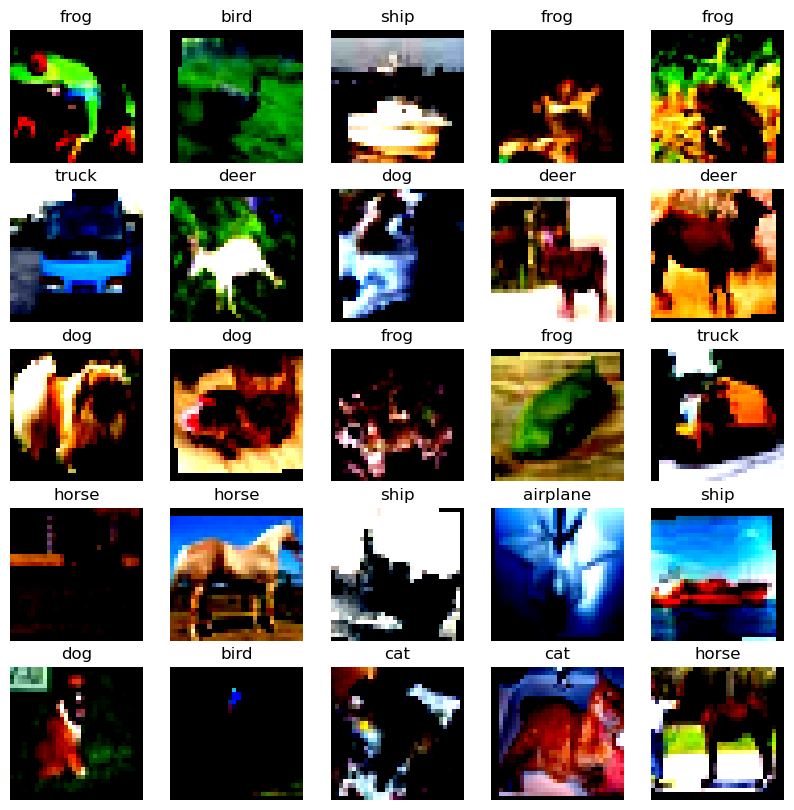

In [ ]:
N_IMAGES = 25

images, labels = zip(*[(image, label) for image, label in
                       [train_data[i] for i in range(N_IMAGES)]])

classes = test_data.classes

plot_images(images, labels, classes)

A solution to this is to *renormalize* the images so each pixel is between $[0,1]$. This is done by clipping the pixel values between the maximum and minimum within an image and then scaling each pixel between $[0,1]$ using these maximum and minimums. 

As we can see the images below look a lot more like we were expecting, along with the rotations and cropping.

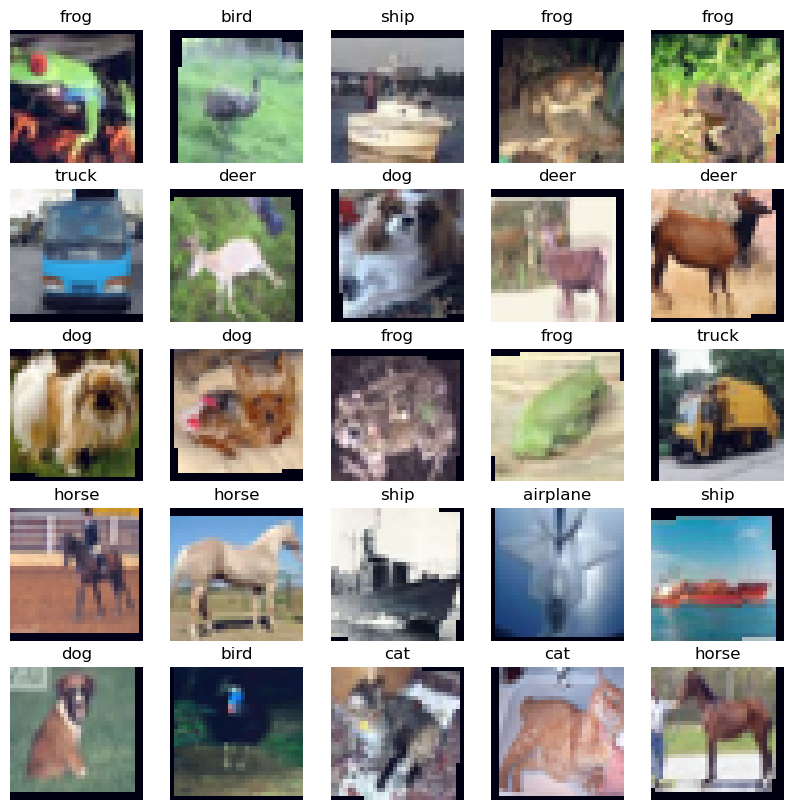

In [ ]:
plot_images(images, labels, classes, normalize=True)

We'll be normalizing our images by default from now on, so we'll write a function that does it for us which we can use whenever we need to renormalize an image.

In [ ]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min=image_min, max=image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image

As before, we'll check what images look like with Sobel filters applied to them.

In [ ]:
def plot_filter(images, filter, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filter = torch.FloatTensor(filter).unsqueeze(0).unsqueeze(0).cpu()
    filter = filter.repeat(3, 3, 1, 1)

    n_images = images.shape[0]

    filtered_images = F.conv2d(images, filter)

    images = images.permute(0, 2, 3, 1)
    filtered_images = filtered_images.permute(0, 2, 3, 1)

    fig = plt.figure(figsize=(25, 5))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(2, n_images, i+1)
        ax.imshow(image)
        ax.set_title('Original')
        ax.axis('off')

        image = filtered_images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(2, n_images, n_images+i+1)
        ax.imshow(image)
        ax.set_title('Filtered')
        ax.axis('off')

The filters are still 2-dimensional but they are expanded to a depth of three dimensions inside the `plot_filter` function.

Below is a filter which detects horizontal lines.

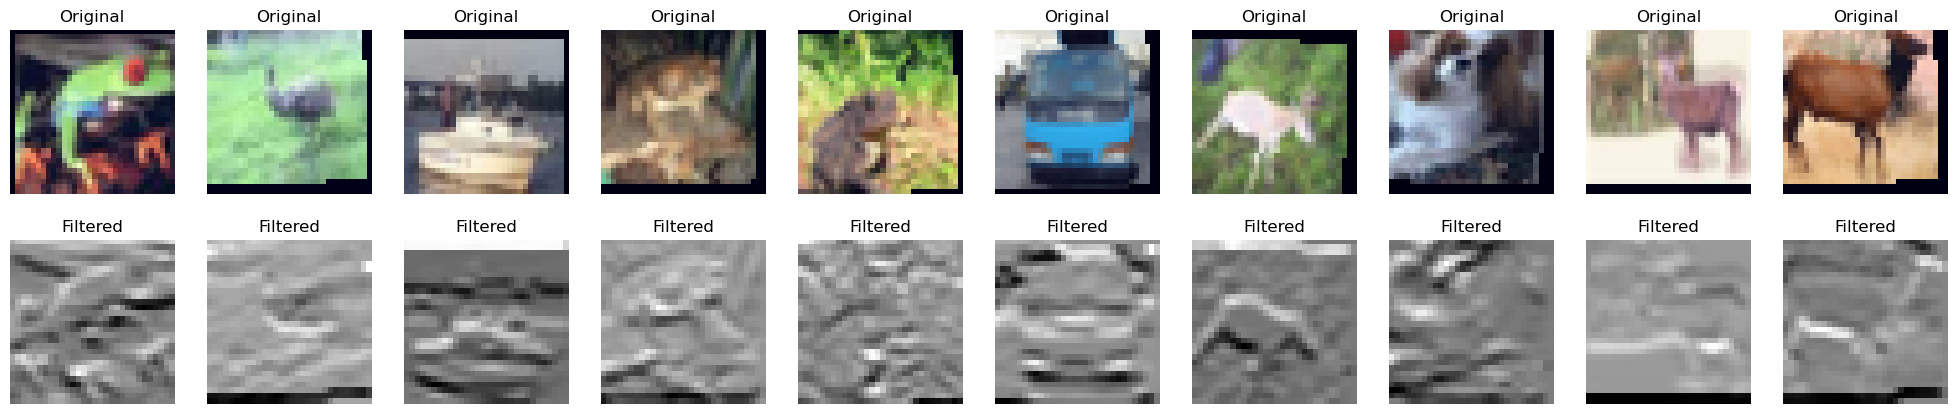

In [ ]:
N_IMAGES = 10

images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]]

horizontal_filter = [[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]]

plot_filter(images, horizontal_filter)

Here's a filter that detects vertical lines.

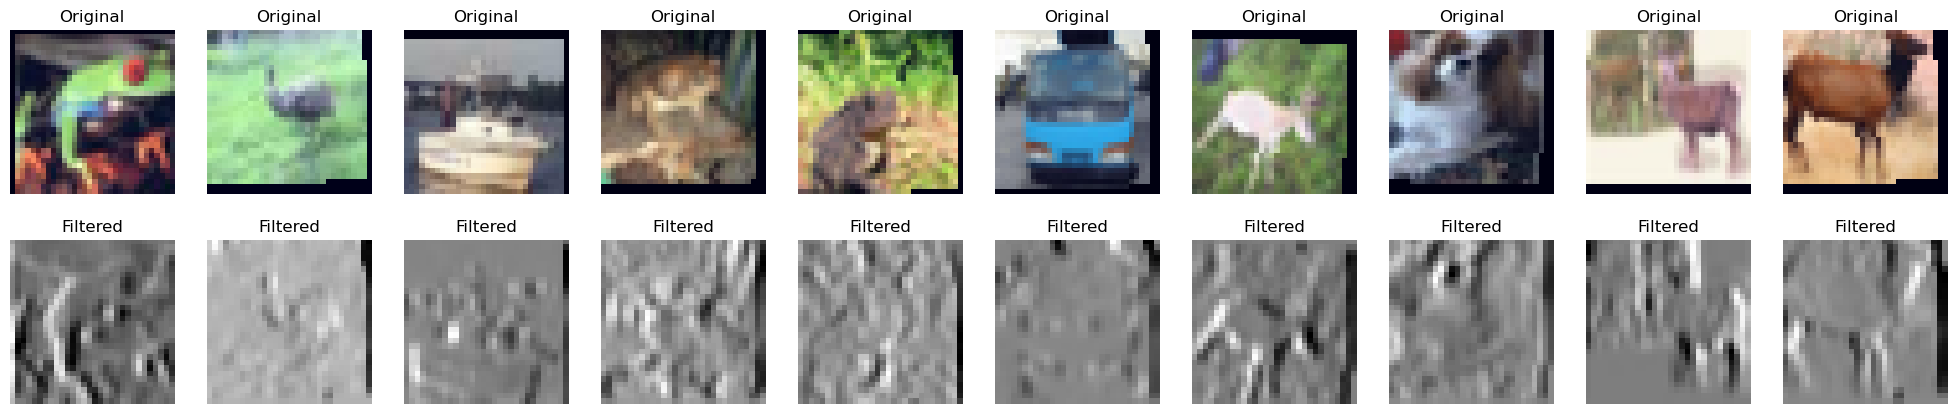

In [ ]:
vertical_filter = [[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]

plot_filter(images, vertical_filter)

We'll also do the same for subsampling/pooling.

In [ ]:
def plot_subsample(images, pool_type, pool_size, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()

    if pool_type.lower() == 'max':
        pool = F.max_pool2d
    elif pool_type.lower() in ['mean', 'avg']:
        pool = F.avg_pool2d
    else:
        raise ValueError(f'pool_type must be either max or mean, got: {pool_type}')

    n_images = images.shape[0]

    pooled_images = pool(images, kernel_size=pool_size)

    images = images.permute(0, 2, 3, 1)
    pooled_images = pooled_images.permute(0, 2, 3, 1)

    fig = plt.figure(figsize=(25, 5))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(2, n_images, i+1)
        ax.imshow(image)
        ax.set_title('Original')
        ax.axis('off')

        image = pooled_images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(2, n_images, n_images+i+1)
        ax.imshow(image)
        ax.set_title('Subsampled')
        ax.axis('off')

As before, the higher filter sizes in the pooling layers means more information is lost, i.e. the image becomes lower resolution.

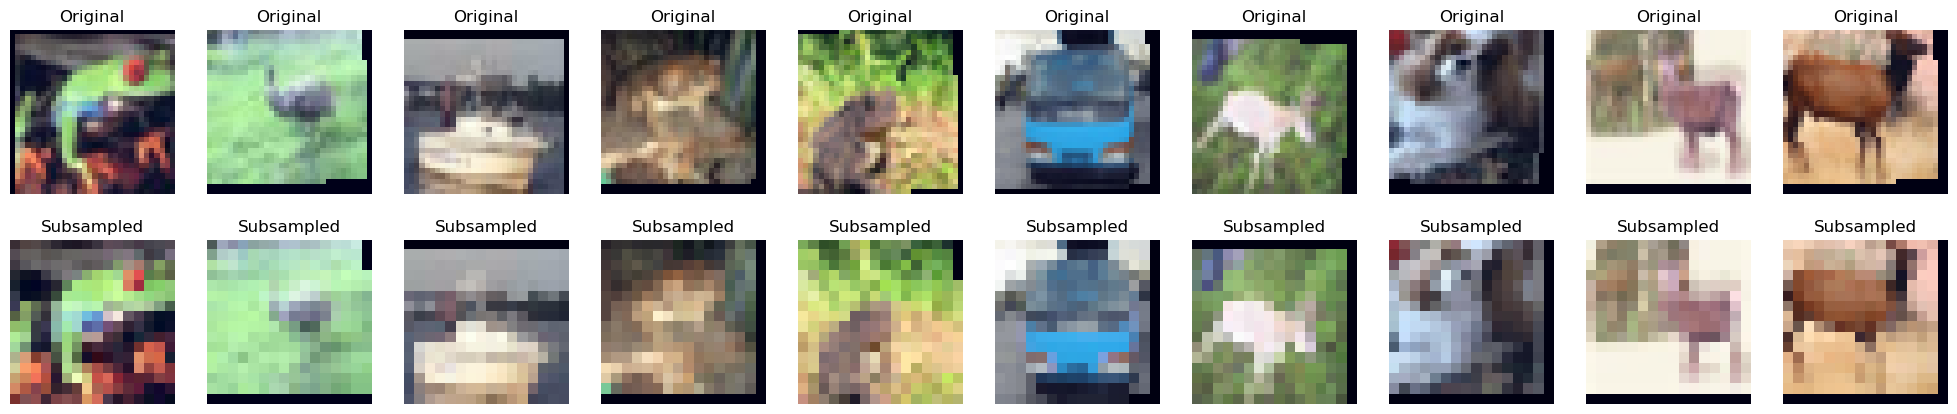

In [ ]:
plot_subsample(images, 'max', 2)

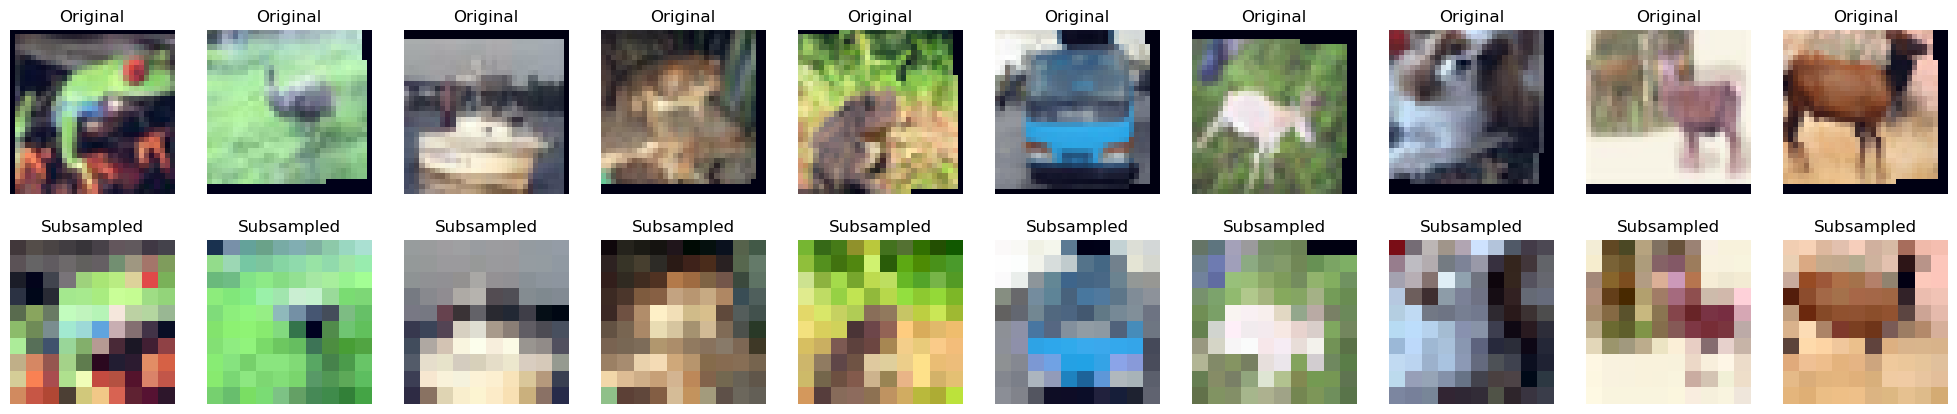

In [ ]:
plot_subsample(images, 'max', 3)

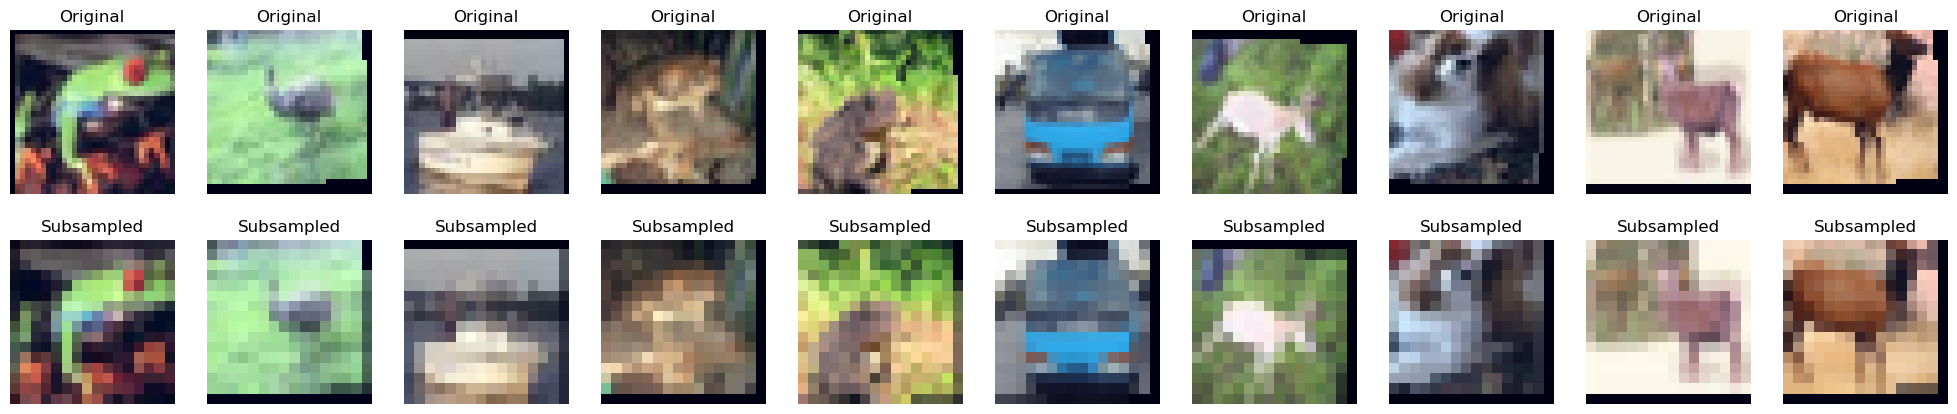

In [ ]:
plot_subsample(images, 'avg', 2)

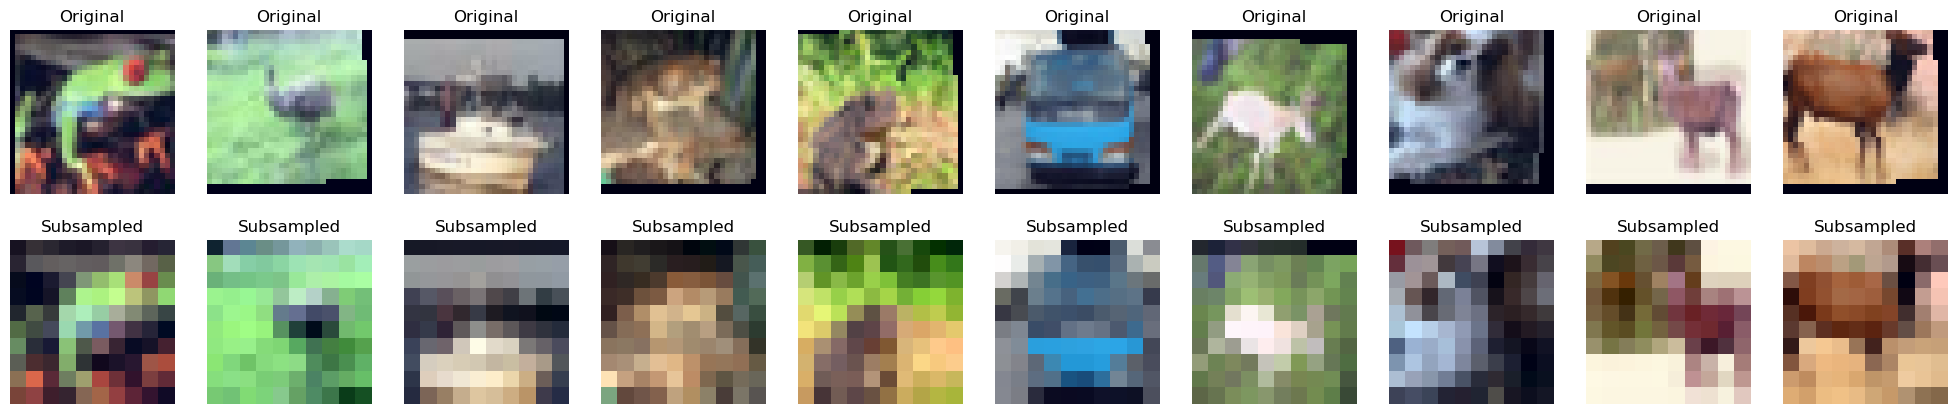

In [ ]:
plot_subsample(images, 'avg', 3)

The final bit of the data processing is creating the iterators.

We use a much larger batch size here than in previous models. Generally, when using a GPU, a larger batch size means our model trains faster. Our model has significantly more parameters and the images it is training on are much larger, than the previous notebook, so will generally take longer. We offset this as much as we can by using a batch size of 256 instead of 64.

In [ ]:
BATCH_SIZE = 256

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

### Defining the Model

Next up is defining the model.

The actual model itself is no more difficult to understand than the previous model, LeNet. It is made up of convolutional layers, pooling layers and ReLU activation functions. See the previous notebook for a refresher on these concepts. 

There are only two new concepts introduced here, `nn.Sequential` and `nn.Dropout`.

We can think of `Sequential` as like our transforms introduced earlier for data augmentation. We provide `Sequential` with multiple layers and when the `Sequential` module is called it will apply each layer, in order, to the input. There is no difference between using a `Sequential` and having each module defined in the `__init__` and then called in `forward` - however it makes the code significantly shorter.

We have one `Sequential` model, `features`, for all the convolutional and pooling layers, then we flatten then data and pass it to the `classifier`, another `Sequential` model which is made up of linear layers and the second new concept, *dropout*.

Dropout is a form of [*regularization*](https://en.wikipedia.org/wiki/Regularization_(mathematics)). As our models get larger, to perform more accurately on richer datasets, they start having a significantly higher number of parameters. The problem with lots of parameters is that our models begin to *overfit*. That is, they do not learn general image features whilst learning to classify images but instead simply memorize images within the training set. This is bad as it will cause our model to achieve poor performance on the validation/testing set. To solve this overfitting problem, we use regularization. Dropout is just one method of regularization, other common ones are *L1 regularization*, *L2 regularization* and *weight decay*.

Dropout works by randomly setting a certain fraction, 0.5 here, of the neurons in a layer to zero. This effectively adds noise to the training of the neural network and causes neurons to learn with "less" data as they are only getting half of the information from a previous layer with dropout applied. It can also be thought of as causing your model to learn multiple smaller models with less parameters. 

Dropout is only applied when the model is training. It needs to be "turned off" when validating, testing or using the model for inference.

As mentioned in the previous notebook, during the convolutional and pooling layers the activation function should be placed **after** the pooling layer to reduce computational cost.

In the linear layers, dropout should be applied **after** the activation function. Although when using ReLU activation functions the same result is achieved if dropout is before or after, see [here](https://sebastianraschka.com/faq/docs/dropout-activation.html).

One last thing to mention is that the very first convolutional layer has an `in_channel` of three. That is because we are handling color images that have three channels (red, green and blue) instead of the single channel grayscale images from the MNIST dataset. This doesn't change the way any of the convolutional filter works, it just means the first filter has a depth of three instead of a depth of one.

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, output_dim):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, 2, 1),  # in_channels, out_channels, kernel_size, stride, padding
            nn.MaxPool2d(2),  # kernel_size
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 192, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 384, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

We'll create an instance of our model with the desired amount of classes.

In [ ]:
OUTPUT_DIM = 10

model = AlexNet(OUTPUT_DIM)

Then we'll see how many trainable parameters our model has. 

Our LeNet architecture had ~44k, but here we have 23.2M parameters - and AlexNet is a relatively small model for computer vision.

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 23,272,266 trainable parameters


### Training the Model

Next up, we'll initialize the parameters of our model.

PyTorch's default initialization is usually fine however by manually trying different initialization schemes we can usually squeeze out a slight performance improvement.

We initialize parameters in PyTorch by creating a function that takes in a PyTorch module, checking what type of module it is, and then using the `nn.init` methods to actually initialize the parameters.

For our convolutional layers, we'll initialize the weights from a Normal distribution with a standard deviation given by:

$$\frac{\text{gain}}{\sqrt{\text{fan mode}}}$$

The value of $\text{gain}$ depends on the non-linearity we will be using after the convolutional layer and we simply tell the initialization function that we are using ReLU which sets the gain to $\sqrt{2}$. The fan mode can be either `fan_in` or `fan_out`. `fan_in` is the number of connections coming into the layer and `fan_out` is the number of connections going out of the layer. For the first convolutional layer the input is from 3x3x3 filter, so the `fan_in` is 27 and the output is 64x3x3,  so the `fan_out` is 576. We leave it to the default `fan_in` mode. This initialization scheme is called *Kaiming Normal*, also known as *He Normal*. See the [paper](https://arxiv.org/abs/1502.01852) to learn more about how it was devised.

For the linear layers we initialize with a Normal distribution but this time the standard deviation is given by:

$$\mathrm{gain}\times\sqrt{\frac{2}{\mathrm{fan\_in}+\mathrm{fan\_out}}}$$

Confusingly, instead of just telling the initialization function which non-linearity we want to use and have it calculate the gain for us, we have to tell it what gain we want to use. Luckily, `nn.init` has a `calculate_gain` function which does that for us, and we just tell it we are using ReLUs. This type of initialize scheme is called *Xavier Normal*, also known as *Glorot Normal*. See the [paper](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) for the theory behind it. 

For both types of layer we initialize the bias terms to zeros.

Why do we even need to initialize our parameters this way? See [this](https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79) article for a great explanation, but the gist of it is that just like how we normalized our input data to have a mean of 0 and a standard deviation of 1, we also want the outputs of each activation function (and therefore the inputs to the subsequent layer) to also have a mean of 0 and a standard deviation of 1. These initialization schemes, by taking account the number of connections in to and out of a layer as well as the non-linearity used, help achieve this normalization effect when initializing weights.

In [6]:
def initialize_parameters(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
        nn.init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, gain=nn.init.calculate_gain('relu'))
        nn.init.constant_(m.bias.data, 0)

We apply the initialization by using the model's `apply` method. This will call the given function on every module and sub-module within the model.

In [ ]:
model.apply(initialize_parameters)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace=True)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): ReLU(inplace=True)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

Next up is the learning rate finder. The code here is taken from a stripped down and slightly modified version of the excellent [pytorch-lr-finder](https://github.com/davidtvs/pytorch-lr-finder). 

**Note**: the learning rate finder is more of an art than a science. It is not going to find an exact learning rate to 10 decimal places which will always give us 100% accuracy - but it is usually going to be better than just picking a learning rate out of thin air.  

The most commonly used optimizer used is Adam. Adam's default learning rate is usually a fine choice but, much like how we manually initialized our parameters to potentially get some performance improvement, we can try and calculate an optimal learning rate manually.

How does the learning rate finder work? We give the finder our model, optimizer and criterion we want to use. However we give it an optimizer with a much lower learning rate than we are expecting to use. We then train the model on the batches of data from the training set - calculating the loss and updating the parameters. After each batch we increase the learning rate exponentially from the initial, extremely low learning rate to a learning rate we know will be too high. This repeats until our loss diverges (over 5x the best loss achieved) or we reach our defined maximum learning rate. 

At each batch we are recording the learning rate and the loss achieved on that batch. By plotting them against each other we can find a suitable learning rate - but more on how to do that in a bit.

The losses calculated are usually quite noisy so we actually save the exponentially weighted average of the loss calculated. 

We also want to use our initialized parameters, not the ones obtained by upgrading the parameters when performing the learning rate finder. Hence we save the model parameters to disk when initializing the finder and then they are reset to our desired initialized ones just before the `range_test` function returns by loading the initial values from disk.

In [ ]:
class LRFinder:
    def __init__(self, model, optimizer, criterion, device):

        self.optimizer = optimizer
        self.model = model
        self.criterion = criterion
        self.device = device

        torch.save(model.state_dict(), 'init_params.pt')

    def range_test(self, iterator, end_lr=10, num_iter=100,
                   smooth_f=0.05, diverge_th=5):

        lrs = []
        losses = []
        best_loss = float('inf')

        lr_scheduler = ExponentialLR(self.optimizer, end_lr, num_iter)

        iterator = IteratorWrapper(iterator)

        for iteration in range(num_iter):

            loss = self._train_batch(iterator)

            lrs.append(lr_scheduler.get_last_lr()[0])

            # update lr
            lr_scheduler.step()

            if iteration > 0:
                loss = smooth_f * loss + (1 - smooth_f) * losses[-1]

            if loss < best_loss:
                best_loss = loss

            losses.append(loss)

            if loss > diverge_th * best_loss:
                print("Stopping early, the loss has diverged")
                break

        # reset model to initial parameters
        model.load_state_dict(torch.load('init_params.pt'))

        return lrs, losses

    def _train_batch(self, iterator):

        self.model.train()

        self.optimizer.zero_grad()

        x, y = iterator.get_batch()

        x = x.to(self.device)
        y = y.to(self.device)

        y_pred, _ = self.model(x)

        loss = self.criterion(y_pred, y)

        loss.backward()

        self.optimizer.step()

        return loss.item()


class ExponentialLR(_LRScheduler):
    def __init__(self, optimizer, end_lr, num_iter, last_epoch=-1):
        self.end_lr = end_lr
        self.num_iter = num_iter
        super(ExponentialLR, self).__init__(optimizer, last_epoch)

    def get_lr(self):
        curr_iter = self.last_epoch
        r = curr_iter / self.num_iter
        return [base_lr * (self.end_lr / base_lr) ** r
                for base_lr in self.base_lrs]


class IteratorWrapper:
    def __init__(self, iterator):
        self.iterator = iterator
        self._iterator = iter(iterator)

    def __next__(self):
        try:
            inputs, labels = next(self._iterator)
        except StopIteration:
            self._iterator = iter(self.iterator)
            inputs, labels, *_ = next(self._iterator)

        return inputs, labels

    def get_batch(self):
        return next(self)

To prepare to use the range finder we define an initial, very low starting learning rate and then create an instance of the optimizer we want to use with that learning rate.

We then define the loss function we want to use, the device we'll use and place our model and criterion on to our device.

In [ ]:
START_LR = 1e-7

optimizer = optim.Adam(model.parameters(), lr=START_LR)

device = torch.device('mps' if torch.mps.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

Next, we'll finally use the range finder.

We first create an instance of the finder class with the model, optimizer, loss function and device. Then we use `range_test` with the training iterator, the maximum learning rate and the number of iterations we want to use. 

In [ ]:
END_LR = 10
NUM_ITER = 100

lr_finder = LRFinder(model, optimizer, criterion, device)
lrs, losses = lr_finder.range_test(train_iterator, END_LR, NUM_ITER)

Stopping early, the loss has diverged


/var/folders/8r/bd41h17j3g733j4twtb7rh9c0000gn/T/ipykernel_25851/3496258672.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('init_param

Next, we can plot the learning rate against the loss. 

As our learning rate was scaled up exponentially we want to plot it on a logarithmic scale. We also do not want to plot the last few values as they are usually where the loss is very high and makes it difficult to examine the graph in detail. You can also skip the first few values as nothing interesting happens there.

In [ ]:
def plot_lr_finder(lrs, losses, skip_start=5, skip_end=5):

    if skip_end == 0:
        lrs = lrs[skip_start:]
        losses = losses[skip_start:]
    else:
        lrs = lrs[skip_start:-skip_end]
        losses = losses[skip_start:-skip_end]

    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(lrs, losses)
    ax.set_xscale('log')
    ax.set_xlabel('Learning rate')
    ax.set_ylabel('Loss')
    ax.grid(True, 'both', 'x')
    plt.show()

As we can see, the loss begins flat and then begins to decrease rapidly before reaching a minimum and starting to increase. 

How can we read this plot and get the optimal learning rate? According to [this](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html) article, we should look for the loss begins to flatten, this is around $10^{-2}$ below, and then reduce that by a factor of 10, which gives us a found learning rate of $10^{-3}$ or $0.001$.

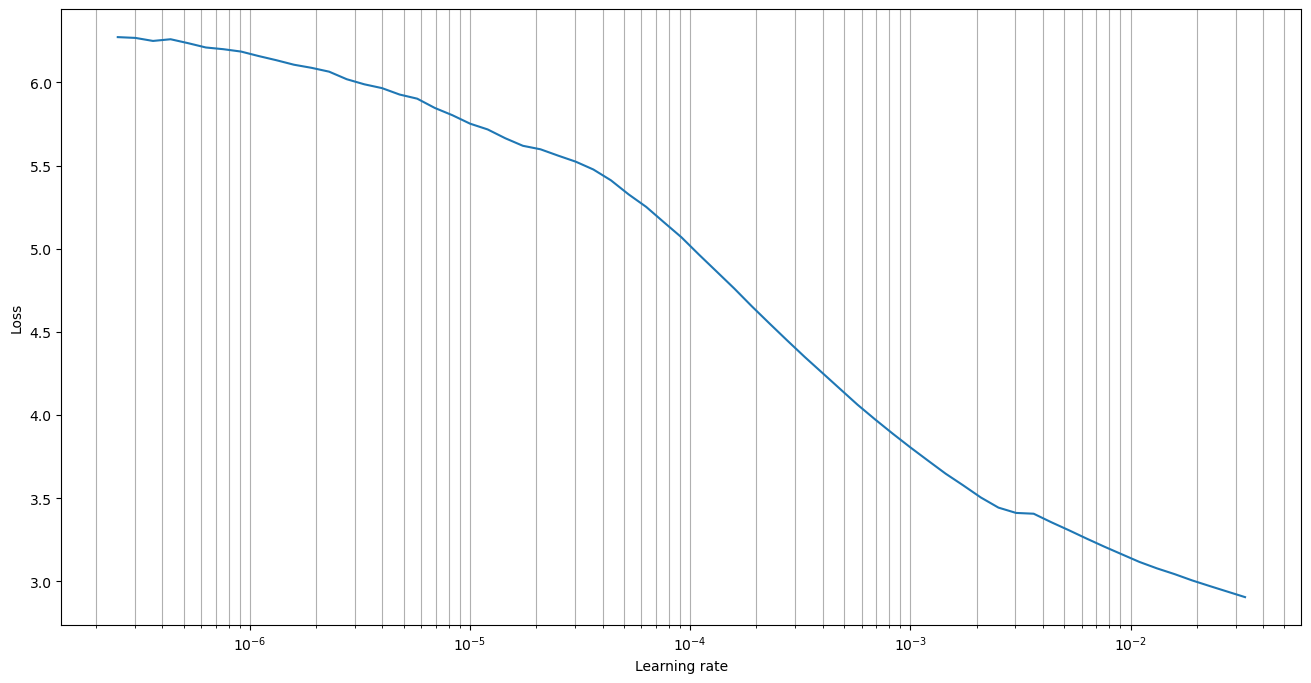

In [ ]:
plot_lr_finder(lrs, losses)

We can now create a new optimizer with our found learning rate.

Ironically, the learning rate value we found, $0.001$ is actually Adam's default learning rate!

In [ ]:
FOUND_LR = 1e-3

optimizer = optim.Adam(model.parameters(), lr=FOUND_LR)

The rest of the notebook is pretty similar to the previous notebooks from these tutorials.

We define a function to calculate accuracy...

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

...and a function to implement our training loop.

As we are using dropout we need to make sure to "turn it on" when training by using `model.train()`.

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

We also define an evaluation loop, making sure to "turn off" dropout with `model.eval()`.

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Next, we define a function to tell us how long an epoch takes.

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

Then, finally, we train our model.

We get a best validation loss of ~76% accuracy.

In [ ]:
EPOCHS = 25

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut3-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 10s
	Train Loss: 2.331 | Train Acc: 23.09%
	 Val. Loss: 1.697 |  Val. Acc: 36.87%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 1.564 | Train Acc: 41.90%
	 Val. Loss: 1.416 |  Val. Acc: 48.05%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 1.381 | Train Acc: 49.78%
	 Val. Loss: 1.243 |  Val. Acc: 55.12%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 1.276 | Train Acc: 54.01%
	 Val. Loss: 1.185 |  Val. Acc: 57.56%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 1.184 | Train Acc: 57.57%
	 Val. Loss: 1.095 |  Val. Acc: 60.77%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 9s
	Train Loss: 1.111 | Train Acc: 60.64%
	 Val. Loss: 1.015 |  Val. Acc: 63.36%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 9s
	Train Loss: 1.062 | Train Acc: 62.46%
	 Val. Loss: 0.981 |  Val. Acc: 65.32%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 9s
	Train Loss: 1.013 | Train Acc: 64.56%
	 Val. Loss: 0.931 |  Val. Acc: 67.09%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 9s
	Train Loss: 0.969 | Train Acc: 66.23%
	 Val. Loss: 0.911 |  Val. Acc: 67.95%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 9s
	Train Loss: 0.927 | Train Acc: 67.71%
	 Val. Loss: 0.883 |  Val. Acc: 68.58%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 9s
	Train Loss: 0.890 | Train Acc: 69.08%
	 Val. Loss: 0.854 |  Val. Acc: 69.55%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 9s
	Train Loss: 0.862 | Train Acc: 70.16%
	 Val. Loss: 0.865 |  Val. Acc: 69.55%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 9s
	Train Loss: 0.836 | Train Acc: 71.13%
	 Val. Loss: 0.812 |  Val. Acc: 71.05%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 9s
	Train Loss: 0.815 | Train Acc: 71.55%
	 Val. Loss: 0.776 |  Val. Acc: 72.62%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 9s
	Train Loss: 0.787 | Train Acc: 72.70%
	 Val. Loss: 0.795 |  Val. Acc: 72.39%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 0m 9s
	Train Loss: 0.767 | Train Acc: 73.61%
	 Val. Loss: 0.761 |  Val. Acc: 72.87%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 0m 9s
	Train Loss: 0.744 | Train Acc: 74.06%
	 Val. Loss: 0.737 |  Val. Acc: 73.81%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 0m 9s
	Train Loss: 0.733 | Train Acc: 74.78%
	 Val. Loss: 0.744 |  Val. Acc: 73.67%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 0m 9s
	Train Loss: 0.711 | Train Acc: 75.30%
	 Val. Loss: 0.736 |  Val. Acc: 74.20%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 0m 9s
	Train Loss: 0.700 | Train Acc: 76.18%
	 Val. Loss: 0.731 |  Val. Acc: 74.69%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 0m 9s
	Train Loss: 0.683 | Train Acc: 76.24%
	 Val. Loss: 0.751 |  Val. Acc: 73.72%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 0m 9s
	Train Loss: 0.668 | Train Acc: 76.84%
	 Val. Loss: 0.685 |  Val. Acc: 75.41%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 0m 9s
	Train Loss: 0.661 | Train Acc: 77.40%
	 Val. Loss: 0.713 |  Val. Acc: 75.09%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 0m 9s
	Train Loss: 0.641 | Train Acc: 78.06%
	 Val. Loss: 0.715 |  Val. Acc: 76.02%


Training:   0%|          | 0/176 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 0m 9s
	Train Loss: 0.631 | Train Acc: 78.35%
	 Val. Loss: 0.700 |  Val. Acc: 76.39%


We then load the parameters of our model that achieved the best validation loss and evaluate this model on the test set to achieve a ~75% accuracy.

In [ ]:
model.load_state_dict(torch.load('test-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

/var/folders/8r/bd41h17j3g733j4twtb7rh9c0000gn/T/ipykernel_30204/1203757271.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('tut3-model.

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Test Loss: 0.697 | Test Acc: 76.37%


### Examining the Model

We will do the exact same probing into our model as we did in the previous notebooks: plotting a confusion matrix, plotting the most confident incorrect predictions, using PCA and t-SNE, and viewing the learned weights of our model.

First, we'll collect all the predictions.

In [ ]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
images, labels, probs = get_predictions(model, test_iterator, device)

Then, for each prediction we get the predicted class.

In [ ]:
pred_labels = torch.argmax(probs, 1)

Next, we plot the confusion matrix. This time we have edited the function to allow us to pass a list of strings which are the labels classes.

In [ ]:
def plot_confusion_matrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels)
    cm = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm.plot(values_format='d', cmap='Blues', ax=ax)
    plt.xticks(rotation=20)

The two classes our model seems to get mixed up the most is cat and dog.

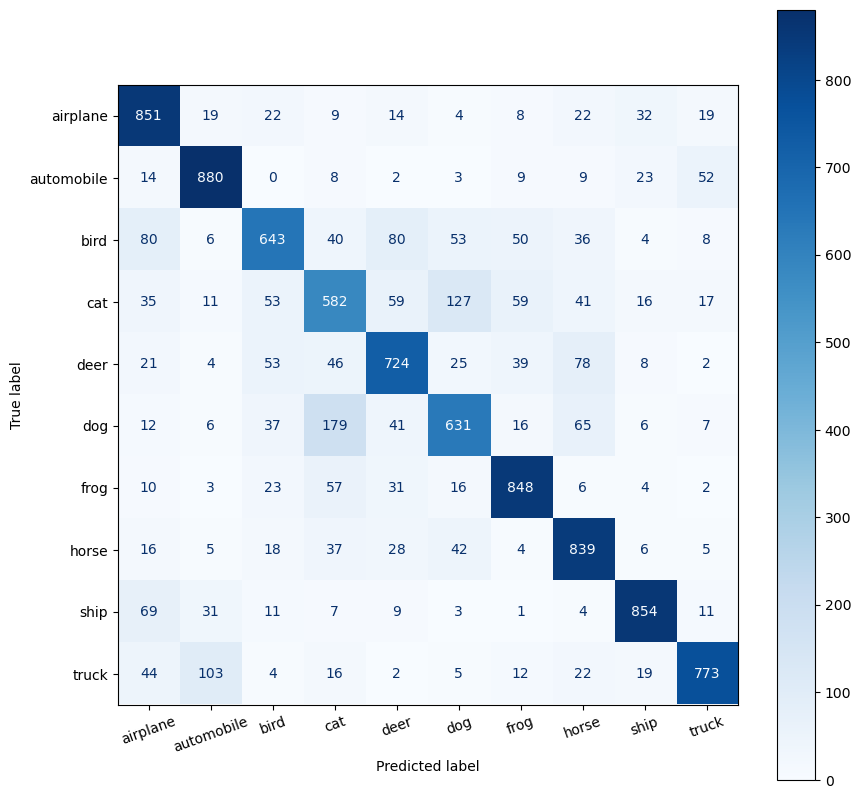

In [ ]:
plot_confusion_matrix(labels, pred_labels, classes)

We can then find which predictions were correct and then sort the incorrect predictions in descending order of their confidence.

In [ ]:
corrects = torch.eq(labels, pred_labels)

In [ ]:
incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse=True,
                        key=lambda x: torch.max(x[2], dim=0).values)

In [ ]:
def plot_most_incorrect(incorrect, classes, n_images, normalize=True):

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(25, 20))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image, true_label, probs = incorrect[i]
        image = image.permute(1, 2, 0)
        true_prob = probs[true_label]
        incorrect_prob, incorrect_label = torch.max(probs, dim=0)
        true_class = classes[true_label]
        incorrect_class = classes[incorrect_label]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.cpu().numpy())
        ax.set_title(f'true label: {true_class} ({true_prob:.3f})\n'
                     f'pred label: {incorrect_class} ({incorrect_prob:.3f})')
        ax.axis('off')

    fig.subplots_adjust(hspace=0.4)

Interestingly, the most incorrect was an example that is incorrectly labelled in the dataset itself. It is clearly a frog, which our model predicted with 100% confidence, but the label is cat.

Truck and automobile seem to be confused a lot but even to humans these two classes are slightly ambiguous.

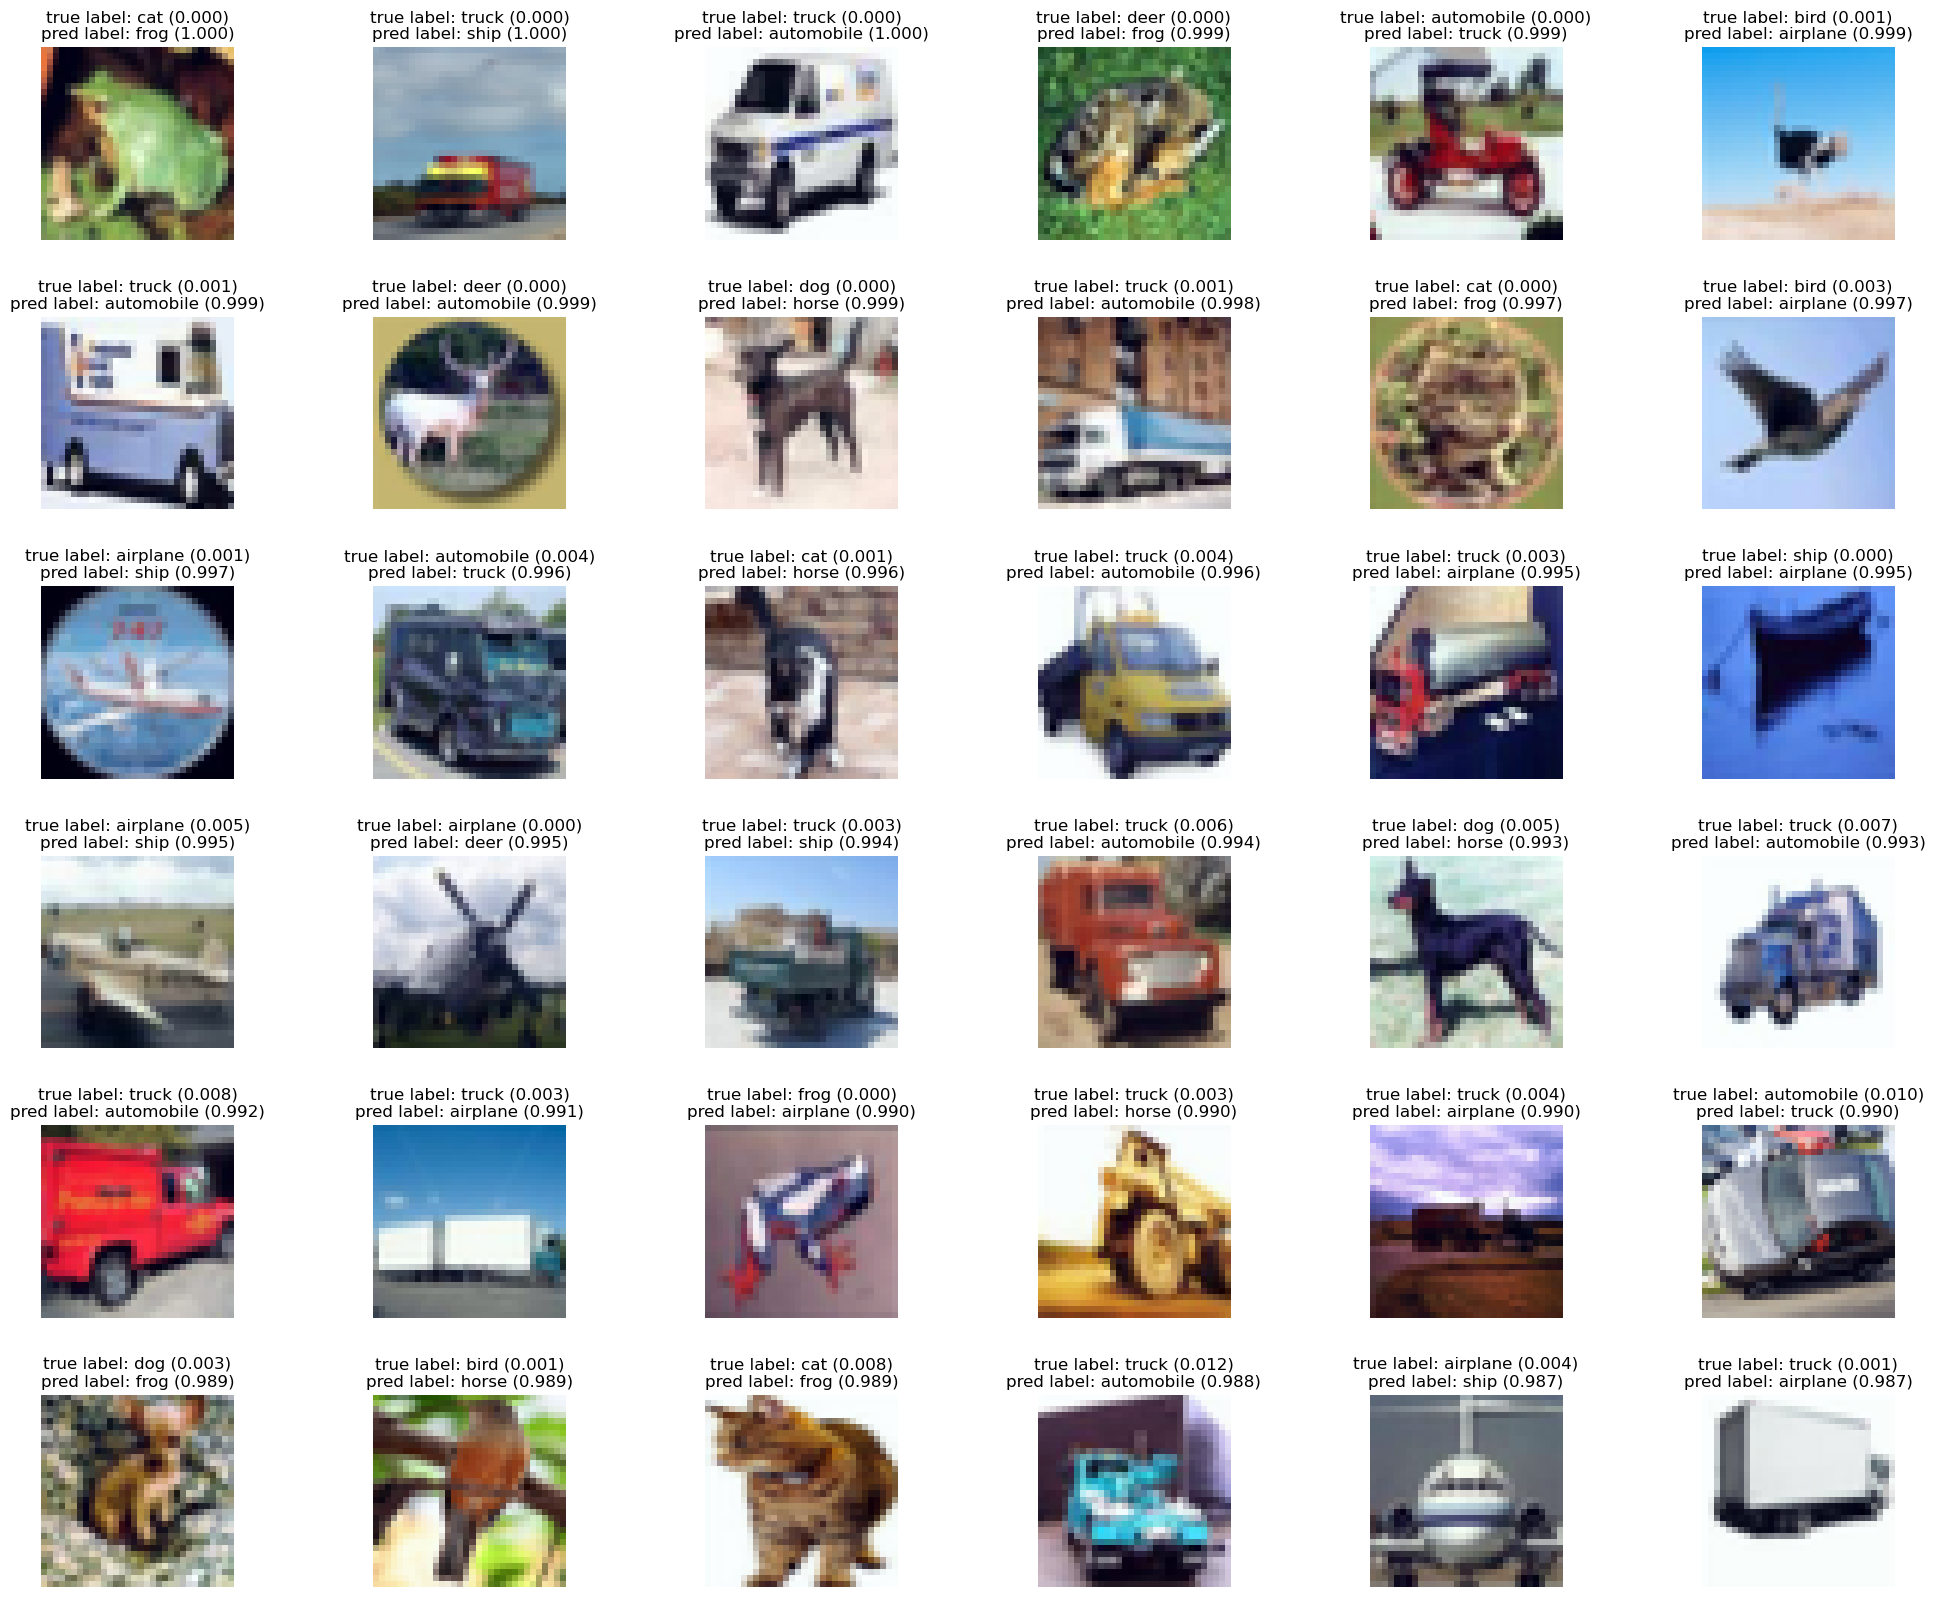

In [ ]:
N_IMAGES = 36

plot_most_incorrect(incorrect_examples, classes, N_IMAGES)

Next, we'll get the output and intermediate (after the flatten) representations.

In [ ]:
def get_representations(model, iterator, device):

    model.eval()

    outputs = []
    intermediates = []
    labels = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, h = model(x)

            outputs.append(y_pred.cpu())
            intermediates.append(h.cpu())
            labels.append(y)

    outputs = torch.cat(outputs, dim=0)
    intermediates = torch.cat(intermediates, dim=0)
    labels = torch.cat(labels, dim=0)

    return outputs, intermediates, labels

In [ ]:
outputs, intermediates, labels = get_representations(model,
                                                     train_iterator,
                                                     device)

  0%|          | 0/176 [00:00<?, ?it/s]

We can then perform PCA on them both and plot them.

In [ ]:
def get_pca(data, n_components=2):
    pca = decomposition.PCA()
    pca.n_components = n_components
    pca_data = pca.fit_transform(data)
    return pca_data

In [ ]:
def plot_representations(data, labels, classes, n_images=None):

    if n_images is not None:
        data = data[:n_images]
        labels = labels[:n_images]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10')
    handles, labels = scatter.legend_elements()
    ax.legend(handles=handles, labels=classes)

Like previous notebooks, the classes seem more separated in the output representations than the intermediate representations.

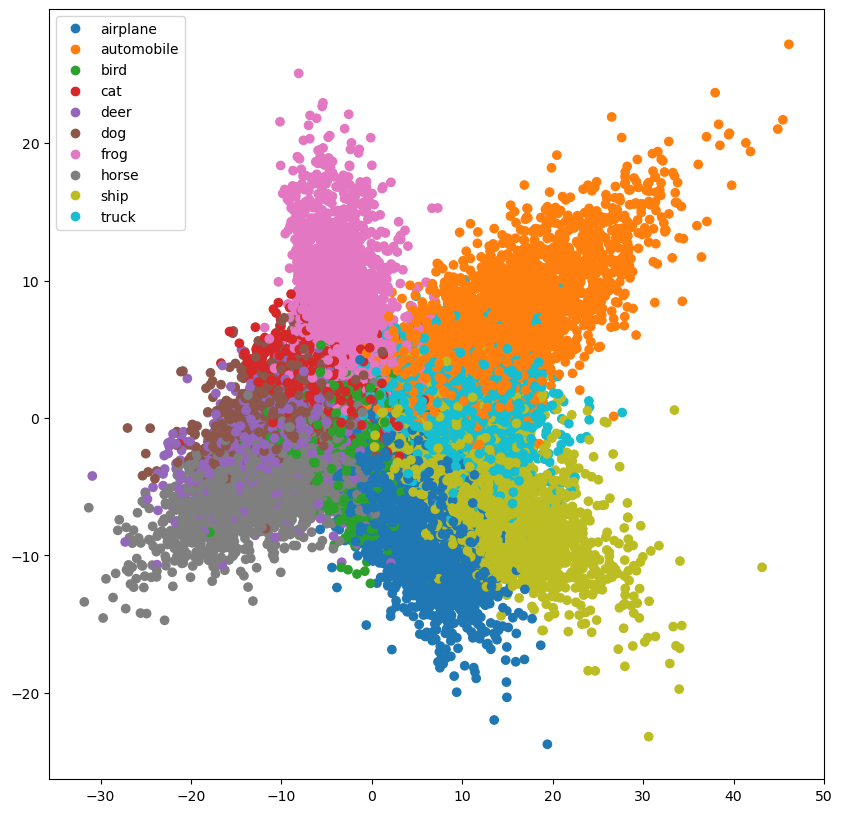

In [ ]:
output_pca_data = get_pca(outputs)
plot_representations(output_pca_data, labels, classes)

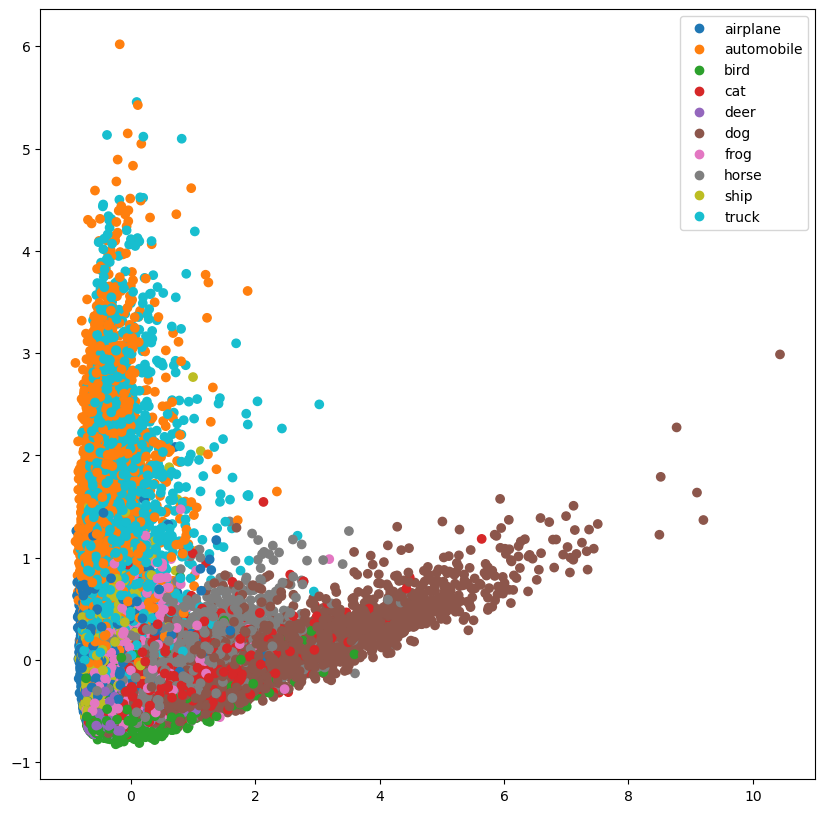

In [ ]:
intermediate_pca_data = get_pca(intermediates)
plot_representations(intermediate_pca_data, labels, classes)

We can do the same with the t-SNE algorithm. 

Again, we only use a subset of the data as t-SNE takes a considerable amount of time to compute.

We also see that the classes are more well separated in the output representations compared to the intermediate representations.

In [ ]:
def get_tsne(data, n_components=2, n_images=None):

    if n_images is not None:
        data = data[:n_images]

    tsne = manifold.TSNE(n_components=n_components, random_state=0)
    tsne_data = tsne.fit_transform(data)
    return tsne_data

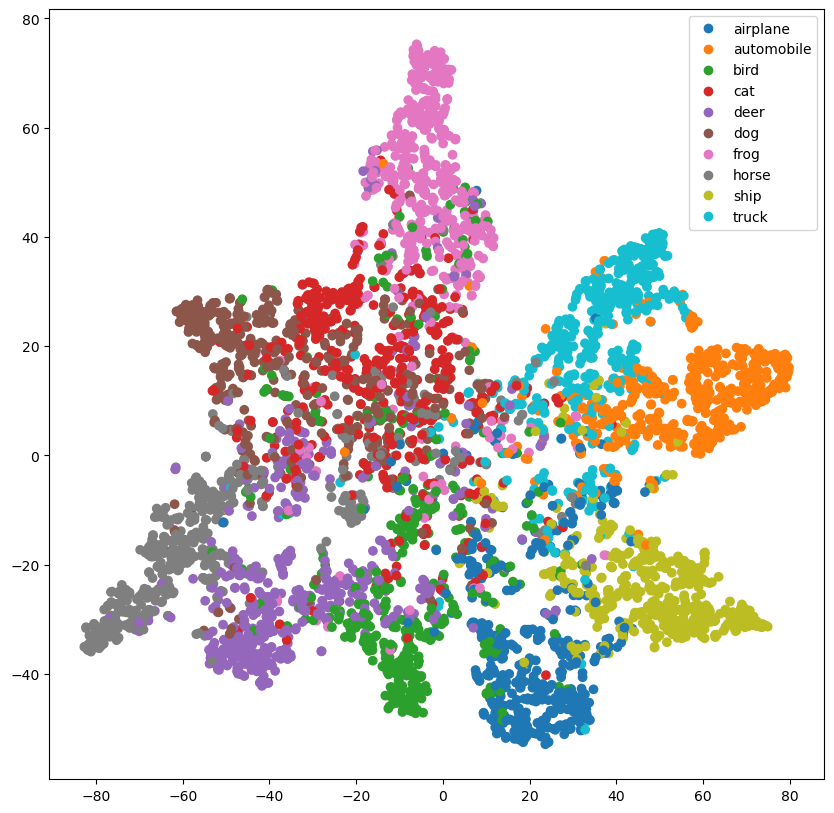

In [ ]:
N_IMAGES = 5_000

output_tsne_data = get_tsne(outputs, n_images=N_IMAGES)
plot_representations(output_tsne_data, labels, classes, n_images=N_IMAGES)

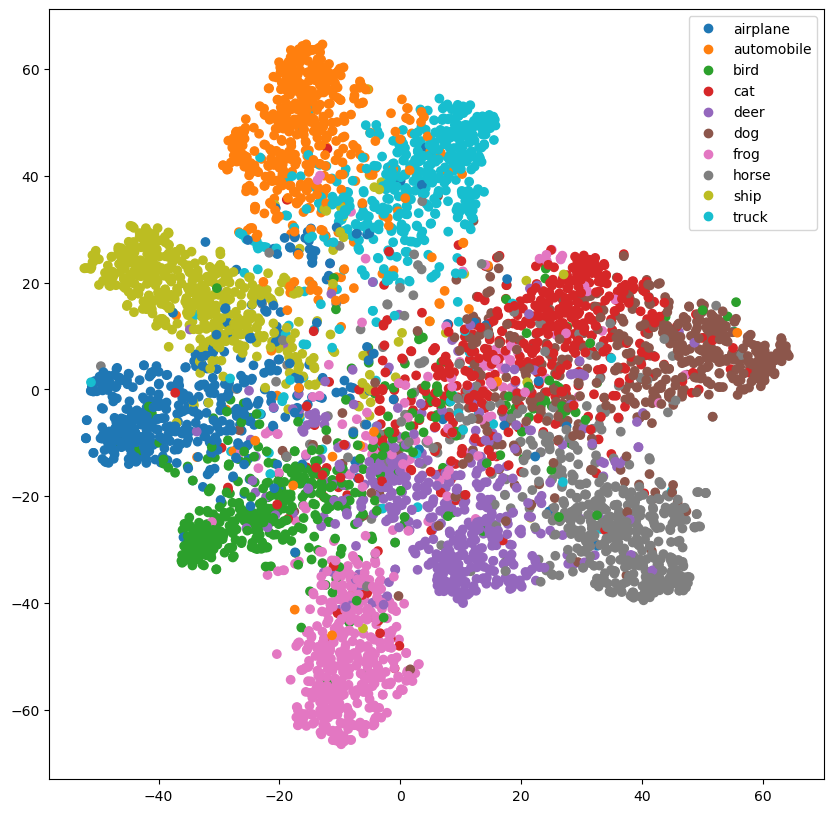

In [ ]:
intermediate_tsne_data = get_tsne(intermediates, n_images=N_IMAGES)
plot_representations(intermediate_tsne_data, labels, classes, n_images=N_IMAGES)

We can also imagine an image belonging to a specified class. 

Spoilers: this didn't work in the previous notebooks, won't work here, and won't work in the future. This is the last time we'll attempt to generate an image.

If you do know a simple method to generate images that look better than pure random noise, feel free to [submit an issue](https://github.com/bentrevett/pytorch-image-classification/issues) on how it is done and it can be added to these tutorials.

In [ ]:
def imagine_image(model, classes, image, device, n_iterations=10_000):

    model.eval()

    label = classes.index(image)

    best_prob = 0
    best_image = None

    with torch.no_grad():

        for _ in trange(n_iterations):

            x = torch.randn(256, 3, 32, 32).to(device)

            y_pred, _ = model(x)

            preds = F.softmax(y_pred, dim=-1)

            _best_prob, index = torch.max(preds[:, label], dim=0)

            if _best_prob > best_prob:
                best_prob = _best_prob
                best_image = x[index]

    return best_image, best_prob

In [ ]:
IMAGE = 'frog'

best_image, best_prob = imagine_image(model, classes, IMAGE, device)

  0%|          | 0/10000 [00:00<?, ?it/s]

We get an image that our model is ~100% confident is a frog, but just looks like random noise.

In [ ]:
print(f'Best image probability: {best_prob.item()*100:.2f}%')

Best image probability: 99.99%


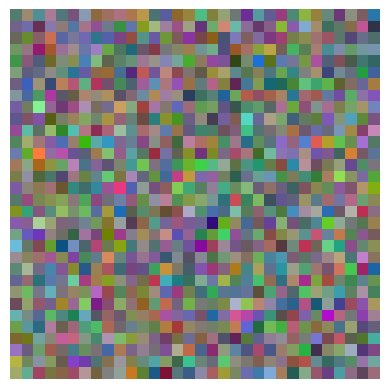

In [ ]:
best_image = normalize_image(best_image)

plt.imshow(best_image.permute(1, 2, 0).cpu().numpy())
plt.axis('off');

Next, we'll plot some images after they have been convolved with the first convolutional layer.

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

We can see different types of edge detection and blurring that the filters have learned that are apparently decent feature extractors for this model and task.

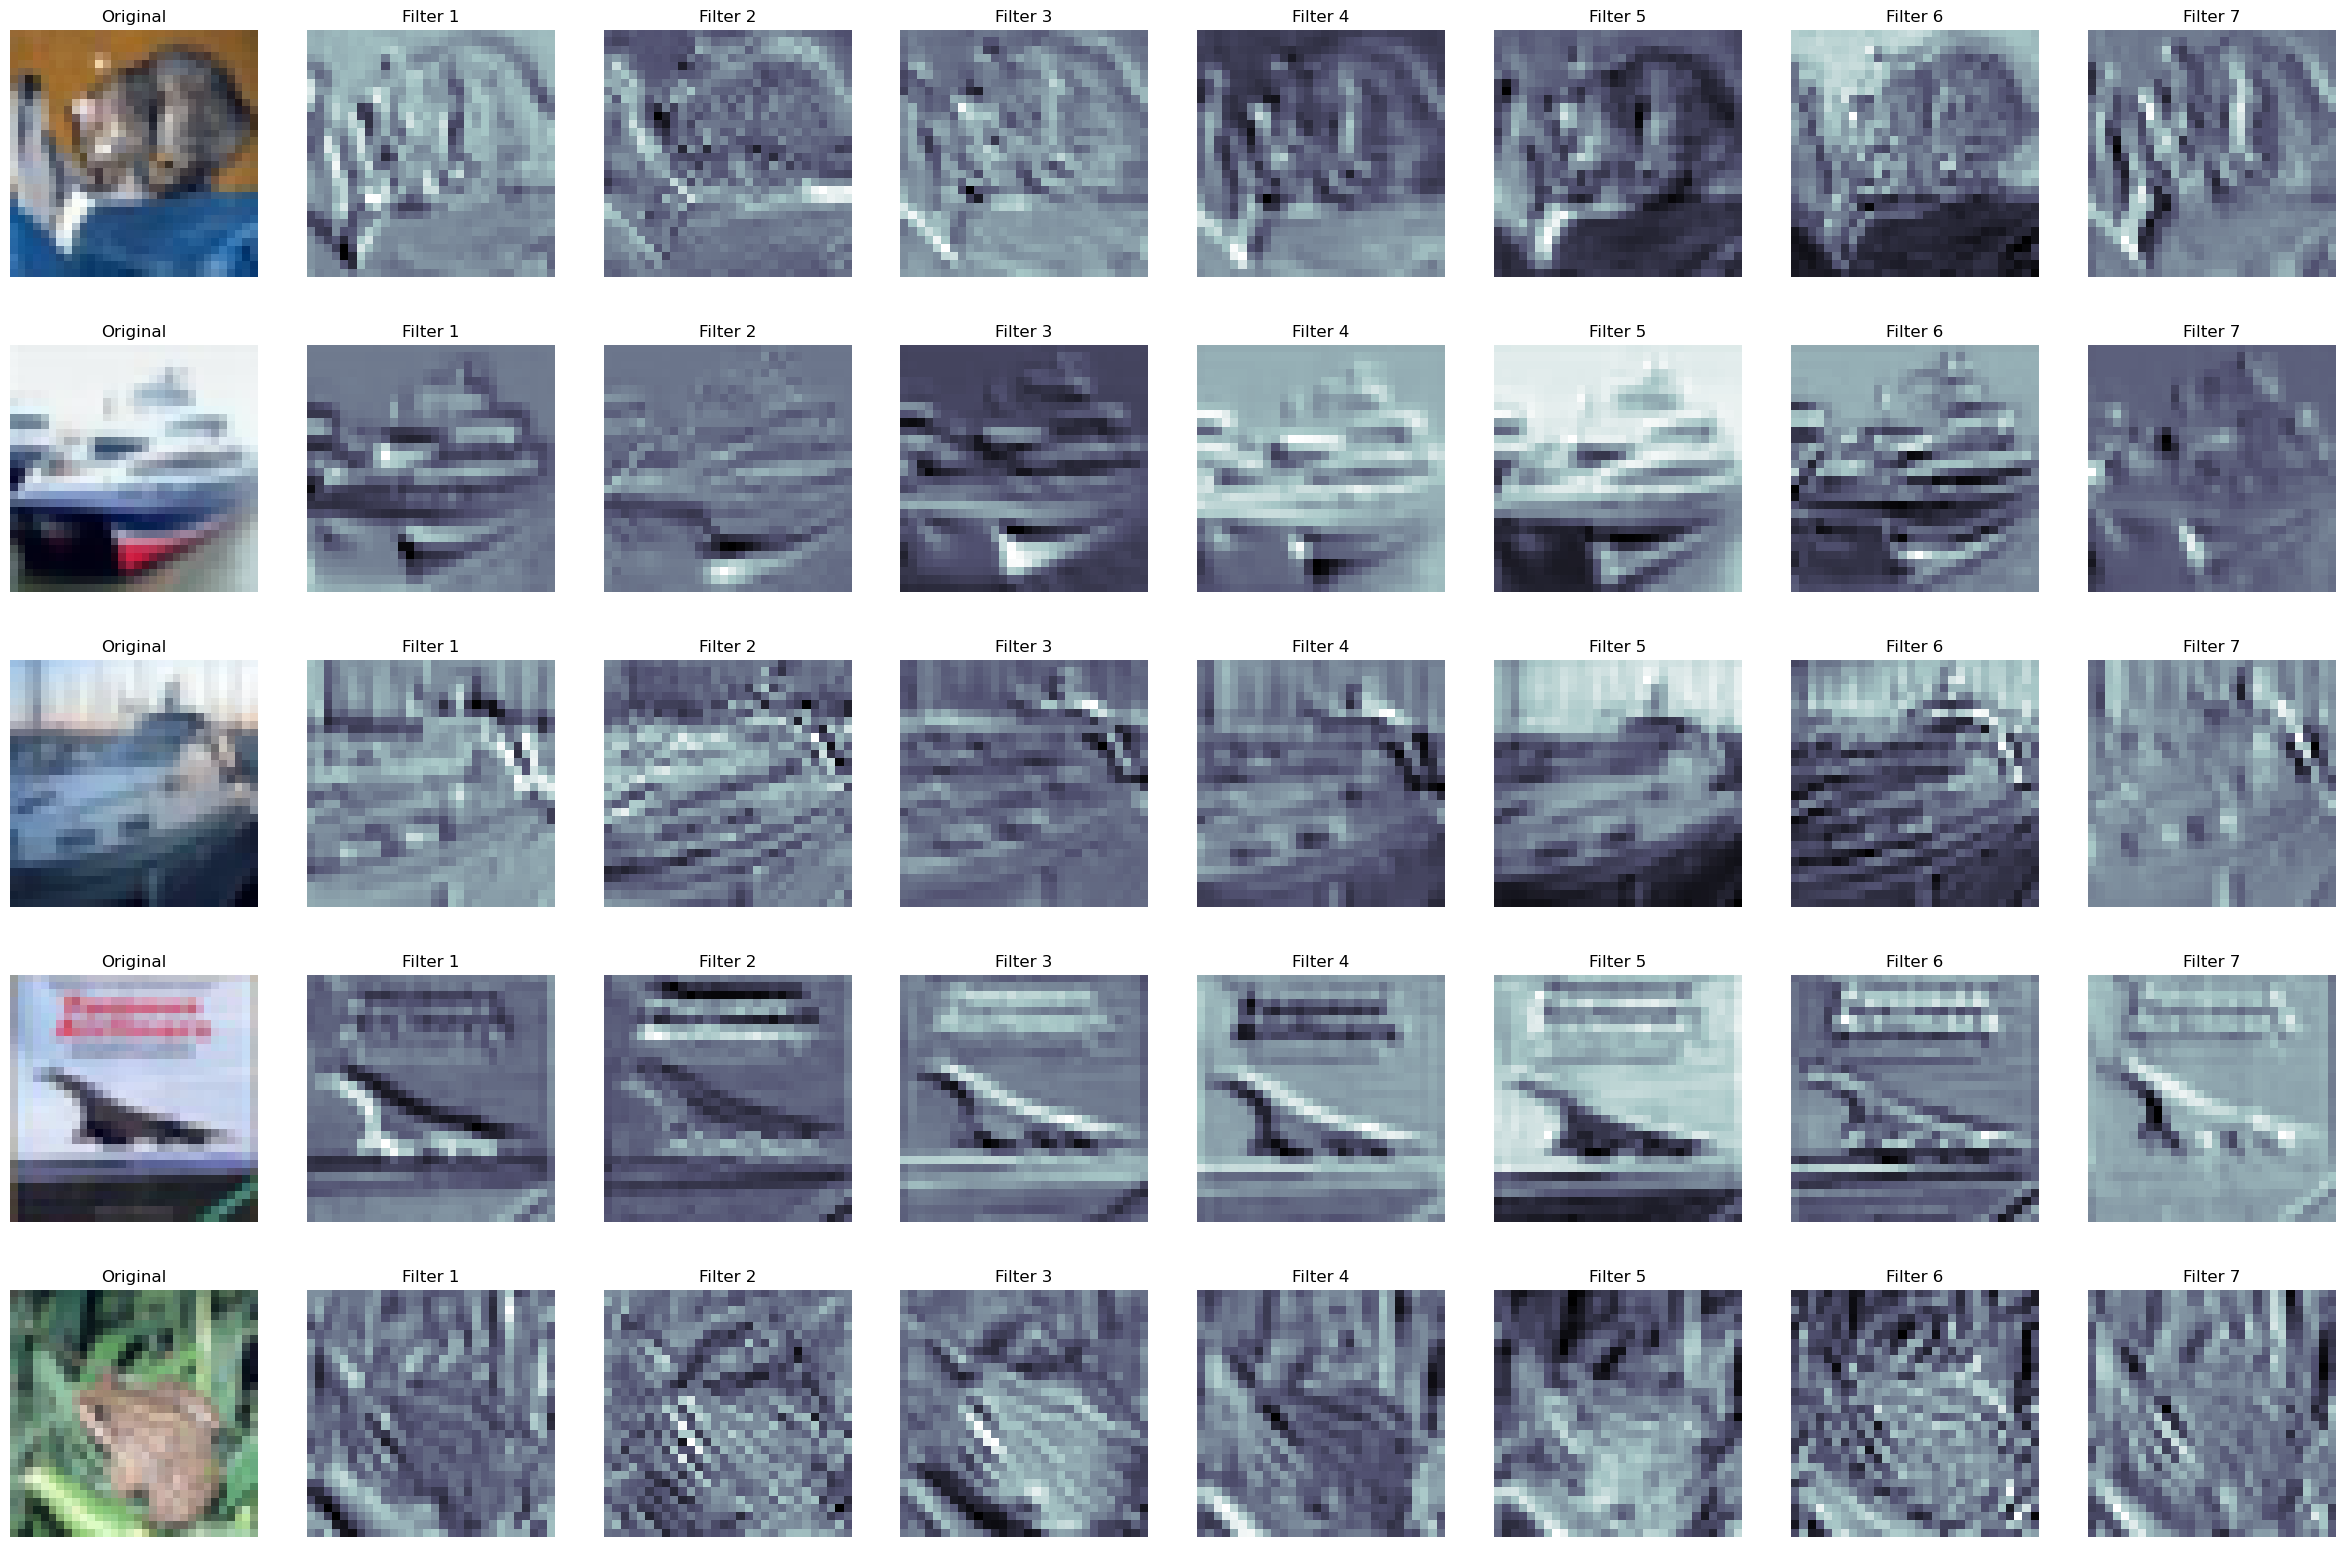

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_data[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

Finally, we can plot the actual filters our model has learned.

In [ ]:
def plot_filters(filters, normalize=True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize=(20, 10))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace=-0.9)

Again, nothing really interpretable here, sadly.

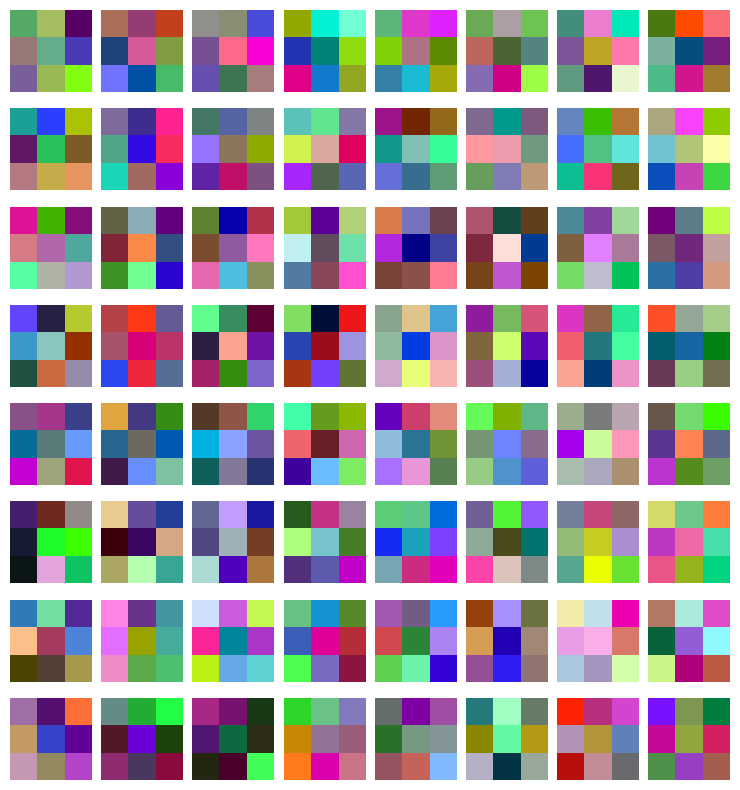

In [ ]:
plot_filters(filters)

Can we ever learn interesting looking filters? Or are we doomed to just look at colorful blocks forever?

Well, we can take a *pre-trained* AlexNet model and view the filters of that. This pre-trained version of AlexNet was trained by people at PyTorch and was not trained on the CIFAR10 dataset, but on the [ILSVRC](https://arxiv.org/abs/1409.0575) dataset, usually just called the ImageNet dataset. ImageNet is a dataset with over 1 million images in 1,000 classes. Torchvision provides ways of downloading different models pre-trained on ImageNet, such as AlexNet and [many others](https://pytorch.org/vision/stable/models.html).  

First, we can import the model making sure to pass `pretrained = True` to get a pre-trained version. Torchvision will then import the model, download the weights for it and load them into the new model.

We can see that this is similar to our AlexNet model but has considerably more parameters.

One interesting thing is that they use much larger filters in the first convolutional layer - 11x11 instead of 3x3.

In [ ]:
model = models.alexnet(pretrained=True)

print(model)

/opt/anaconda3/envs/2025_May26/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/2025_May26/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/chandra/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:26<00:00, 9.11MB/s] 


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

We can then get the learned values of these filters the same way we did for our version of AlexNet and then plot them.

As we can see the patterns are much more interesting, though still not really interpretable.

So how come it learned these interesting looking filters? Is it just because the filters are bigger? Is it because models can only do well on ImageNet if they learn more interesting filters? Or something else?

Do more interesting looking filters imply that they perform better? Or are these filters showing how the model has overfit to patterns on the images within ImageNet?

It is difficult to answer these questions as modern computer vision architectures now seem to favour smaller filter sizes with their largest filters being 5x5 - so maybe larger filters aren't that good after all?

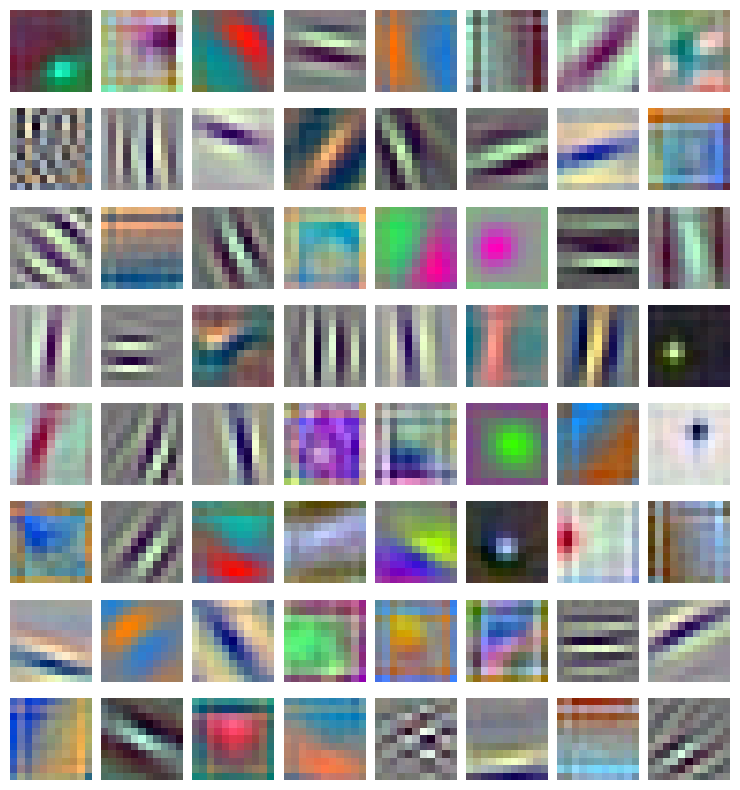

In [ ]:
filters = model.features[0].weight.data

plot_filters(filters)

In [ ]:
from torchvision.datasets import ImageFolder

images = ImageFolder("./data/Chessman-image-dataset/Chess")
images


Dataset ImageFolder
    Number of datapoints: 552
    Root location: ./data/Chessman-image-dataset/Chess

In [ ]:
images[2]

(<PIL.Image.Image image mode=RGB size=1000x1722>, 0)

In [ ]:
images[300]

(<PIL.Image.Image image mode=RGB size=1200x1200>, 3)

In [ ]:
import torch
torch.device("mps")

device(type='mps')